# __Customer Segmentation__

## Introduction

Customer segmentation is the process of dividing customers into groups based on common characteristics such as demographics, behavior, or preferences. This is important for businesses because it allows them to tailor their marketing, sales, and customer service strategies to specific groups of customers. For example, it can used to improve customer understanding, i.e. by segmenting customers, businesses gain a deeper understanding of their needs, preferences, and behaviors. This allows them to better serve their customers, create more targeted marketing campaigns, and improve customer satisfaction. 

In addition, when businesses understand their customer segments, they can create more targeted marketing campaigns that are more likely to resonate with the intended audience. This can increase the effectiveness of marketing efforts, leading to more sales and revenue. Customer segmentation also allows businesses to create personalized experiences for different groups of customers, which can lead to increased customer loyalty and retention. Moreover, by targeting specific customer segments, businesses can save money on marketing and advertising by only reaching out to those who are most likely to buy their products or services.

By understanding their customers better, businesses can create more effective strategies that lead to customers being satisfied and thus higher revenue.

## Problem Statement and Motivation

Since I was a child, I have always wondered how the store decides which of the products should be on sale on a specific day and why sometimes the product becomes sold out in a matter of seconds and the other day nobody even pays attention to it. Why have I never seen certain products with red price labels? How does the store decide how often to buy some groceries, not to mention how they choose the right number? It was something I have considered thought-provoking until I have actually understood how it works and how easily one can make a wrong decision, which will lead to the decrease in revenue and to customer dissatisfaction. After realizing that a lot of such decisions rely on the analysis of customers, products sold, products people buy on special occasions etc. altogether, I have started asking myself, what customer group do I belong to? Based on the spent money only I can roughly estimate what should the group I belong to look like, however, there is certainly more to it than I can see. But how actually can the customer groups be identified? This question piqued my interest in this field and that is the exact reason why I decided to explore it on my own and get the feeling of what the analysis and segmentation process actually looks like in the real world.

My __goal__ for this project was to implement different clustering algorithms to identify the main groups of customers for the dataset. Also, after finding these groups, my objective was to characterize these groups with the help of visualization tools and to make an attempt at understanding consumer behaviour and gaining a deeper understanding of the challanges and opportunities within this industry.

__So the outline of the project looks roughly like this.__

At first, I have looked through the whole dataset, visualized some of the relationships and identified the key features in the dataset that allowed me to find out more about the population structure and gave me the opportunity to approximate the popularity of the mall with certain types of customers. For example, the Education feature is one of these and it reveals that, in the place where the mall is located, there are a lot of people with high school diploma at most and a really low number of people who finished their graduate studies. This information, in turn, gave me the hint what age ranges should be expected for each of customer groups based on education solely. This data assisted me in comprehending what kinds of clusters I anticipated to see after actually performing clustering, and these insights emerged to be extremely helpful in further comparision of the results of different clustering algorithms. A Principal Component Analysis has been performed for dimensionality reduction. For the clustering itself, I have run four easily distinguishable clustering models, which were K-Means, DBSCAN, Gaussian Mixture and Agglomerative Clustering, on the the PCA components to cluster customer population into different segments and have performed optimization for each of these models separately to receive clusters best describing the data. Next, after choosing the best clustering algorithm I have created pictures of the  customers from each cluster, which can act as a guide for the mall's marketing and advertising to reach their ideal customers presented in this dataset.

## Brief Summary

In this project, the customer data has been analyzed in order to perform Customer Segmentation for a given FMCG store. FMCG stores are these where they sell fast-moving consumer goods which have a short shelf life because of high consumer demand, such are milk, fruit and vegetables, baked goods. 

The best clustering algorithm turned out to be the __Gaussian Mixture algorithm__, which predicted that customers should be divided into __7 groups__ based on their demographic data from bonus cards. The general portraits of the customers from each cluster have been created and are shown in the figure below.

<img src="https://raw.githubusercontent.com/Sofxley/customer-segmentation/main/images/summary_profiling.png" width="800" height="600" />

The summary of each cluster incorporates the ideal customer's biological sex, age, marital status, category of occupation, median annual income for the group, level of education, and the size of the city the customer lives in. If some of the characteristics are not mentioned in the cluster description that means the cluster spans all options or the entire range of values. The ones mentioned are considered to be prevailing over other options of the characteristic.

## Table of Contents:
1. [Imports and Useful Functions](#imports)
2. [Exploring the Data](#explore)
3. [Dimensionality Reduction](#dimred)
4. [Clustering](#clustering) 
    * [KMeans](#kmeans)
    * [DBSCAN](#db)
    * [Gaussian Mixtures](#gm)
    * [Agglomerative Clustering](#agg)
5. [Comparison of Clustering Algorithms](#compare)
6. [Customer Profiling](#profile)
7. [Summary of Clusters](#summary)
8. [Conclusions and Feature Work](#conclusion)

## About [Dataset](https://www.kaggle.com/datasets/dev0914sharma/customer-clustering?select=segmentation+data.csv)

The dataset contains basic demographic data about the customers like Customer ID, age, gender, annual income, marital status, occupation etc. The goal is to understand the customers groups there are and identify unsatisfied customer needs to inform the decision-making for the marketing team and allow them to plan the strategy accordingly. By using this kind of data the company can then outperform the competitors by developing uniquely appealing products and services for the specific groups of customers of theirs.

The dataset consists of information about the purchasing behavior of 2,000 individuals from a given area when entering a physical ‘FMCG’ store. All data has been collected through the loyalty cards they use at checkout. The data has been preprocessed and there are no missing values. In addition, the volume of the dataset has been restricted and anonymised to protect the privacy of the customers. 

dataset shape : (2000, 8)

The features of the dataset:
* __ID__: Shows a unique identificator of a customer.
* __Sex__: Biological sex (gender) of a customer. In this dataset there are only 2 different options (0 - male, 1 - female).
* __Marital status__: Marital status of a customer (0 - single, 1 - non-single (divorced / separated / married / widowed)).
* __Age__: The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset (118 min value, 76 max value).
* __Education__: Level of education of the customer (0 - other/unknown, 1 - high school, 2 - university, 3 - graduate school).
* __Income__: Self-reported annual income in US dollars of the customer  (35832 min value, 309364 max value).
* __Occupation__: Category of occupation of the customer (0 - unemployed / unskilled, 1 - skilled employee / official, 2 - management / self-employed / highly qualified employee / officer).
* __Settlement size__: The size of the city that the customer lives in (0 - small city, 1 - mid-sized city, 2 - big city).

<a id="imports"></a>
# Imports and Useful Functions

##### NOTE: Throughout almost the whole notebook I am using the units __kdol.__ for Income and that stands for __thousands of dollars__ or k$. Please be aware of that.

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import scipy.cluster.hierarchy as shc

# Import tools for visualizations
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MultipleLocator, FixedLocator, FixedFormatter
from matplotlib.patches import ConnectionPatch
from matplotlib import patheffects

# Import algorithms, metrics for clustering.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture

SEED=5
plt.style.use('ggplot') 
plt.rc('axes', labelsize=10, labelweight='ultralight', titleweight='bold', titlesize='12',)
plt.rc('xtick', labelsize=9, )
plt.rc('ytick', labelsize=9, )

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

# Since the data has already been preprocessed, we don't have any categorical values, 
# but we'll need some to make the plots friendly for the reader.
feature_labels = {
    'Sex':['male','female'], 
    'Marital status': ['single', 'non-single'],   
    'Education':['other / unknown','high school','university','graduate school'],
    'Occupation':['unemployed / unskilled', 'skilled employee / official', 
                  'self-employed / other'],
    'Settlement size':['small city', 'mid-sized city', 'big city']
}

In [2]:
def plot_clusters3d(cluster_groups, cluster_col, title, colorscale=None, legend=True):
    '''
    Creates a 3D scatterplot of clusters. The color of data points is determined by colorscale parameter.
    '''
    # Create a figure.
    fig = go.Figure()
    
    # Plot scatter points for each cluster.
    for cluster in cluster_groups[cluster_col].unique():
        # Get the data points for that specific cluster.
        cluster_group = cluster_groups[cluster_groups[cluster_col] == cluster]
        # Add some scatter belonging to the cluster to the plot.
        trace = go.Scatter3d(x=cluster_group[0], y=cluster_group[1], z=cluster_group[2], 
                             mode='markers', marker=dict(size=4 ,opacity=0.8, colorscale=colorscale), 
                             legendwidth=2, name=cluster,)
        fig.add_trace(trace)
        
    # Add title and legend.
    fig.update_layout(showlegend=legend, width=700, height=600, 
                      legend=dict(font=dict(size=20), itemsizing="constant", ),
                      title=dict(text=title, x=0.5))
    fig.show()

    
def colored_scatterplot(data, x, y, hue, color_palette='hls', **kwargs):
    '''
    Draw a scatterplot with hue being a grouping variable that will produce points with different colors.
    '''
    colors = sns.color_palette(color_palette, data[hue].nunique())
    
    # To color scatterplot points by category we need to group the data by this category.
    groups = data.groupby(hue)
    
    # For each group plot the points with the corresponding color.
    for i, (name,group) in enumerate(groups):
        plt.plot(group[x], group[y], marker='o', linestyle='',label=name, c=colors[i], **kwargs)
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(feature_labels.get(hue), title=hue)
    plt.grid(alpha=0.5)
    plt.title("{} vs {} w.r.t. {}".format(x, y, hue))

    
def stacked_countplot_with_labels(data, colors, xlabel, ylabel, ax, **kwargs):
    # Create a stacked countplot.
    ax = data.unstack().plot(kind='bar', stacked=True, color=colors, edgecolor='black', ax=ax,
                             xlabel=xlabel, ylabel=ylabel, **kwargs)
    
    # Add labels to the bar chart.
    for c in ax.containers:
        # if the segment is small or 0, skip it
        labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='center', fontstyle='oblique', 
                     fontvariant='small-caps', bbox=dict(facecolor='white',alpha=0.5,pad=1.6))
    return ax
    
    
def description(data):
    '''
    Returns the DataFrame representing a thorough description of the data.
    '''
    dtypes = data.dtypes
    counts = data.apply(lambda col: col.count())
    nulls = data.apply(lambda col: col.isnull().sum())
    nan_ratio = nulls / counts
    uniques = data.apply(lambda col: col.unique())
    n_uniques = data.apply(lambda col: col.nunique())
    maxs = data.apply(lambda col: col.max())
    mins = data.apply(lambda col: col.min())
    
    cols = {'dtypes':dtypes, 'counts':counts, 'nulls' : nulls, 'nan_ratio': nan_ratio,
            'max':maxs, 'min':mins,'n_uniques':n_uniques, 'uniques':uniques}
    return pd.DataFrame(data=cols)

<a id="explore"></a>
# Exploring the Data

Let's get to know the data we will be working with a little bit better. For that we will check the data for null values, the ranges of feature values etc., and then we'll make use of some visualization tools and try to gain some insights about the data we are dealing with.

In [3]:
customer_data = pd.read_csv("/kaggle/input/customer-clustering/segmentation data.csv")
data = customer_data.copy()
data

ID  Sex  Marital status  Age  Education  Income  Occupation  \
0     100000001    0               0   67          2  124670           1   
1     100000002    1               1   22          1  150773           1   
2     100000003    0               0   49          1   89210           0   
3     100000004    0               0   45          1  171565           1   
4     100000005    0               0   53          1  149031           1   
...         ...  ...             ...  ...        ...     ...         ...   
1995  100001996    1               0   47          1  123525           0   
1996  100001997    1               1   27          1  117744           1   
1997  100001998    0               0   31          0   86400           0   
1998  100001999    1               1   24          1   97968           0   
1999  100002000    0               0   25          0   68416           0   

      Settlement size  
0                   2  
1                   2  
2                   0  
3                   1  
4                   1  
...               ...  
1995                0  
1996                0  
1997                0  
1998                0  
1999                0  

[2000 rows x 8 columns]

In [4]:
description(data)

dtypes  counts  nulls  nan_ratio        max        min  \
ID               int64    2000      0        0.0  100002000  100000001   
Sex              int64    2000      0        0.0          1          0   
Marital status   int64    2000      0        0.0          1          0   
Age              int64    2000      0        0.0         76         18   
Education        int64    2000      0        0.0          3          0   
Income           int64    2000      0        0.0     309364      35832   
Occupation       int64    2000      0        0.0          2          0   
Settlement size  int64    2000      0        0.0          2          0   

                 n_uniques                                            uniques  
ID                    2000  [100000001, 100000002, 100000003, 100000004, 1...  
Sex                      2                                             [0, 1]  
Marital status           2                                             [0, 1]  
Age                     58  [67, 22, 49, 45, 53, 35, 61, 28, 25, 24, 60, 3...  
Education                4                                       [2, 1, 0, 3]  
Income                1982  [124670, 150773, 89210, 171565, 149031, 144848...  
Occupation               3                                          [1, 0, 2]  
Settlement size          3                                          [2, 0, 1]

Fortunately, the dataset doesn't contain any null values and is consistent with the description, so we're just going to proceed to the EDA section. 

In [5]:
# Change the type of categorical features from numerical to category.
for col in ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']:
    data[col] = data[col].astype('category')

#### Piecharts and Countplots

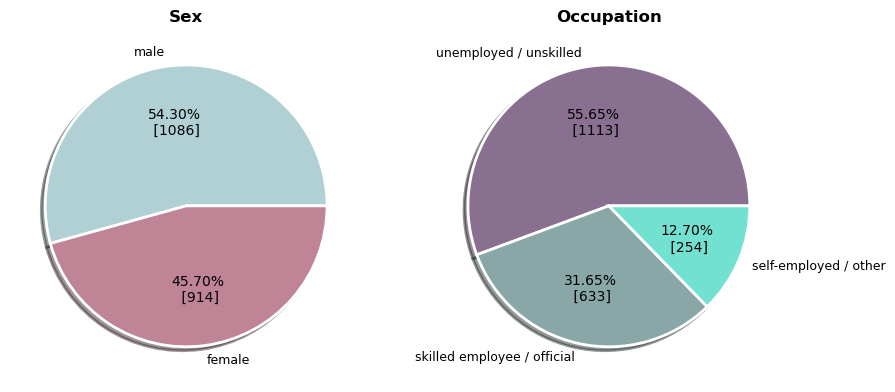

In [6]:
plt.figure(figsize=(10,5))

# Pie chart for Sex
plt.subplot(121, title='Sex')
plt.pie(data['Sex'].value_counts(), labels=feature_labels['Sex'],
        autopct=lambda val: '{:1.2f}%\n [{:.0f}]'.format(val,
                                        val * data['Sex'].value_counts().sum() / 100),
        colors = ["#B0D0D3", "#C08497"],
        wedgeprops=dict(width=1, edgecolor='white',linewidth=2), shadow=True,)

# Pie chart for Occupation
plt.subplot(122, title='Occupation')
plt.pie(data['Occupation'].value_counts(), labels=feature_labels['Occupation'],
        autopct=lambda val: '{:1.2f}%\n [{:.0f}]'.format(val,
                                        val * data['Occupation'].value_counts().sum() / 100),
        colors = ["#8a7090", "#89A7A7", "#72E1D1"],
        wedgeprops=dict(width=1, edgecolor='white',linewidth=2), shadow=True,)

plt.show()

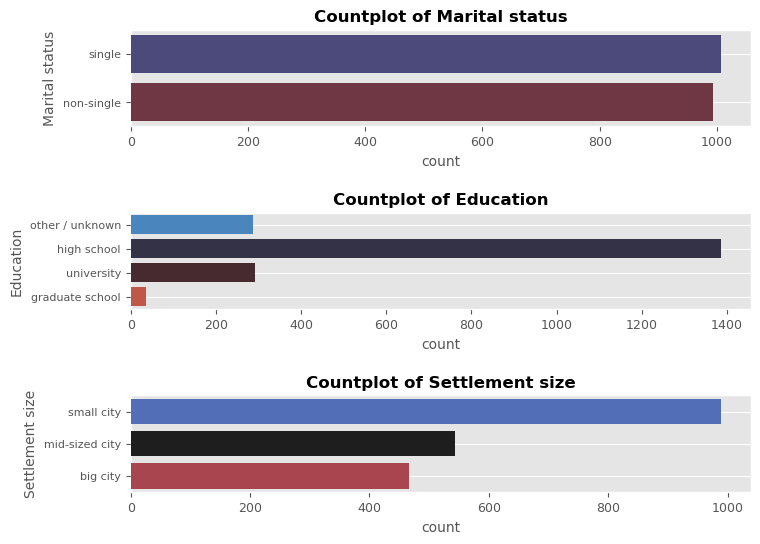

In [7]:
fig, ax = plt.subplots(3,1,figsize=(8,6))
plt.subplots_adjust(hspace=0.9, wspace=0.4)

for i, feature in enumerate(['Marital status', 'Education', 'Settlement size']):
    plt.subplot(3,1,i+1)
    sns.countplot(data=data, y=feature, palette='icefire', width=0.8, zorder=3,)
    plt.gca().set_yticklabels(feature_labels[feature], fontsize=8)  
    plt.grid()
    plt.title('Countplot of {}'.format(feature))

Let's now analyze each of the plots.

*Sex*: This dataset contains the basic information about 2000 customers, and most of them are men, in particular 1086 customers are males. Still, the dataset is pretty balanced w.r.t. sex.

*Marital Status*: Non-single label here corresponds to divorced / separated / married / widowed. As we can see the number of single people and the number of non-single people is roughly the same.

*Education*: From the data in this dataset, we can deduce that the highest degree the majority of customers in this supermarket mall have is the high school diploma. Sometimes people with the first degree stop by, and more rarely do people with a higher degree. There is some number of people who either haven't mentioned their education level in the membership card or have written down other kind of educational attainment.

*Occupation*: The majority of our customers do have a job. Relating this information to education levels of customers we see that there is around 600 unemployed customers, who are supposedly the people who don't have a job at this very moment, high schoolers/students, elderly people or customers who just decided not to mention it. Also, there are around 200 customers whose occupations are some of these: management / self-employed / highly qualified employee / officer.

*Settlement size*: The half of the customers happen to live in small cities, while the rest are living in either mid-sized or big cities.

#### Distribution plots

Let's look at the distribution of values for Age and Income features.

In [8]:
# Change the scale of the Income feature, convert the values to thousands of dol. instead of just dol.
data['Income'] = data['Income']/1e3

# The median income
data.Income.median()

115.5485

Text(0.5, 1.0, 'Income Distribution')

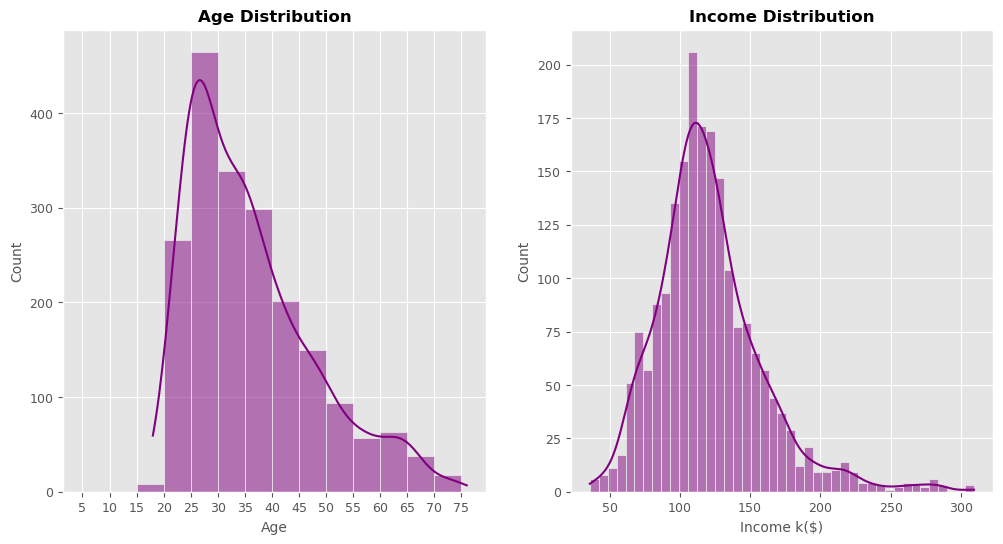

In [9]:
fig = plt.figure(figsize=(12,6))

plt.subplot(121)
sns.histplot(data=data, x='Age', bins=np.arange(5,80,5),kde=True,color='purple')
plt.gca().xaxis.set_major_locator(MultipleLocator(5))
plt.title('Age Distribution')

plt.subplot(122)
sns.histplot(data=data, x=data['Income'],color='purple',kde=True,)
plt.xlabel('Income k($)')
plt.title('Income Distribution')

Most of the customers are between 30 to 40 years old, meanwhile the annual income is spread between 90-150 k($). Both of these distributions are right-skewed.

Text(0.5, 0.98, 'Distribution of Age')

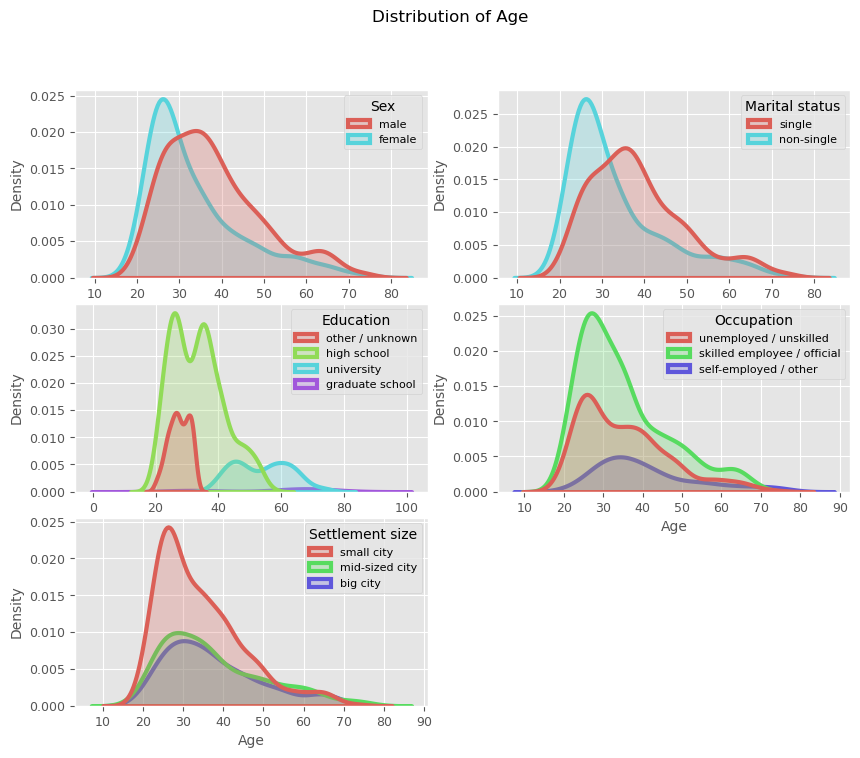

In [10]:
plt.figure(figsize=(10,8))
plt.subplots_adjust(hspace=0.14)

# Distribution plots for Age w.r.t. to other features.
for i, col in enumerate(['Sex', 'Marital status', 'Education','Occupation', 'Settlement size']):
    plt.subplot(3,2,i+1)
    g = sns.kdeplot(data=data, x='Age', hue=col, palette='hls',linewidth=3, fill=True, )
    
    # Update the legend.
    for t, l in zip(g.legend_.texts, feature_labels[col]):
        t.set_text(l)
    sns.move_legend(g, "upper right", fontsize=8)

plt.suptitle('Distribution of Age')

The plots above show us the distribution of age with respect to different categorical values in our dataset. First, recall that the ratio of the number of females to the number of males in our dataset is almost one, i.e. the dataset contains almost the same number of women as the number of men. That said, we see that there are more older men than women in the data with the median age for men 36 years, and for women 30 years.

Concerning marital status, the plot suggests that the people who are 'single' are usually older than these who are 'non-single'. In the central left plot we see that the data consists mostly of the high school graduates in their 30s, also there are people a bit youger than the ones mentioned in their 20s who either have not filled in this section or have other educational attainment. Usually the people who have graduated from university are in their 50s, whilst these who finished their graduate studies are older with the median age of 65.

As for the occupation variable, we see that the majority of customers is in their 30s for each of the curves. So we can't really tell what the customer's occupation is if we were to come across one of the customers, unless we will be relying on probabilities based on the number of members in each category, still this feature and the age aren't enough to form distinct clusters of customers. The same can be said about the settlement size.

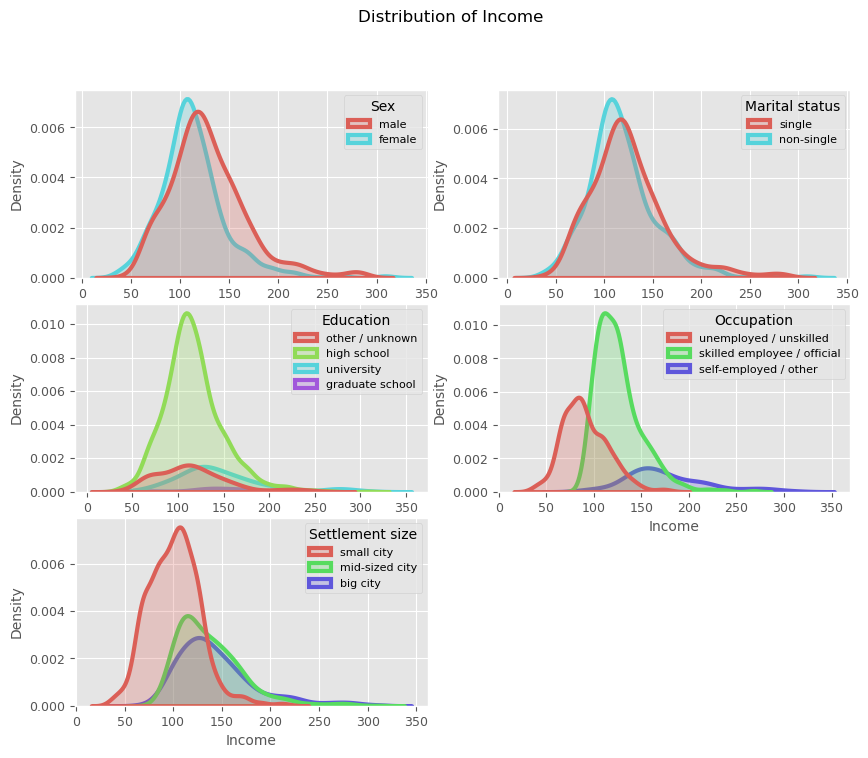

In [11]:
plt.figure(figsize=(10,8))
plt.subplots_adjust(hspace=0.14)

# Distribution plots for Income w.r.t to other features.
for i, col in enumerate(['Sex', 'Marital status', 'Education','Occupation', 'Settlement size']):
    plt.subplot(3,2,i+1,)
    g = sns.kdeplot(data=data, x='Income', hue=col, palette='hls',linewidth=3, fill=True, )
    
    # Update the legend.
    g.legend_.set_title(col)
    for t, l in zip(g.legend_.texts, feature_labels[col]):
        t.set_text(l)
    sns.move_legend(g, "upper right", fontsize=8)

plt.suptitle('Distribution of Income');

The upper left plot suggests that females in this dataset tend to have a bit lower annual income than males. Also, the right upper plot shows that single people earn slighly more (118 k dollars)) than non-single (112 k dollars). The distribution with respect to eduacation shows that the higher is the level of education, the higher is the income, as expected. We come to the similar conclusion when we look at the occupation curves. However, we see some difference in the settlement size curves. Of course, we still see that the larger the city is, the higher is the income, but for mid-sized and big cities the difference in median income becomes quite blurry. 

Now, I must mention that we definitely need to explore the relationships, for example, between occupation and settlement size and settlement size and education, to understand what types of customers frequent to the mall, and we'll do so a bit further in the analysis.

#### Scatterplots

Let's see what the relation between the Age and Income with respect to different categorical features reveals about the data.

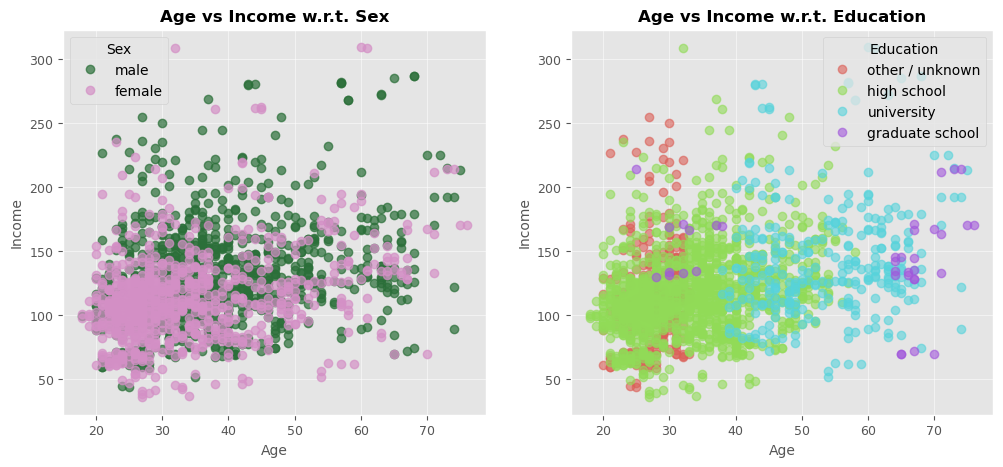

In [12]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

plt.subplot(121)
colored_scatterplot(data, x='Age', y='Income', hue='Sex', color_palette='cubehelix', alpha=0.7, )

plt.subplot(122)
colored_scatterplot(data, x='Age', y='Income', hue='Education', color_palette='hls', alpha=0.6)

This firstplot doesn't seem to give us a lot to think about, except for the fact that the customers are usually women 20-45 y.o., or men 20-60 y.o.. Besides, the scatterplot shows that generally men tend to earn more than women.

On the contrary, the second figure shows a lot of information. Firstly, it shows us that people who have an unknown educational degree are usually in their 20s or 30s, and have the median salary or lower than that. Secondly, the majority of customers who have the high school diploma at most are 20-55 years old, and have somewhat around the median annual income, or higher. Concerning the population who graduated from university with a bachelor's degree, they are usually 40-65 y.o. by now and have a slightly higher income than these with high school diploma solely. As for graduates, who are either young or over 60 y.o. by now, they too have a slightly higher income than the median income, but that can't be stated with certainty, because we don't have a lot customers with that kind of educational attainment.

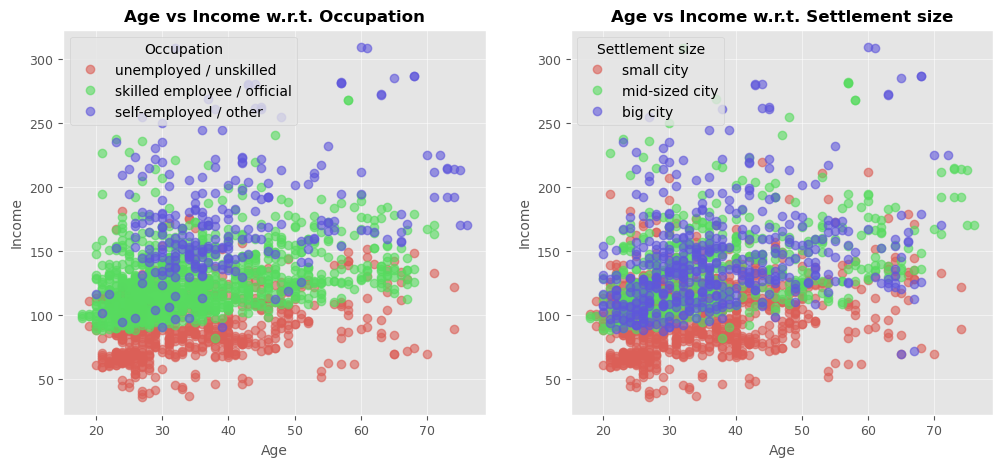

In [13]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

plt.subplot(121)
colored_scatterplot(data, x='Age', y='Income', hue='Occupation', color_palette='hls', alpha=0.6)

plt.subplot(122)
colored_scatterplot(data, x='Age', y='Income', hue='Settlement size', alpha=0.6)

As for the first plot, it's common sense to think that the more skilled the person is, the higher income they have. And this plot confirms it. The plot on the right shows that people living in small cities are usually paid less, meanwhile the annual salaries of these living in larger cities commonly range from 100 kdol. to 250 kdol..

#### The Analysis of the Customers based on the Education Level

Instead of commenting each graph, we'll first plot all the relationships we are interested in and then sum up the information about the education groups we have.

In [14]:
def add_barlabel(ax, labels):    
    rects = ax.patches
    for rect, label in zip(rects, labels):
        width=rect.get_width()
        ax.text(width+50, rect.get_y()+rect.get_height()*0.7, label, ha='center')

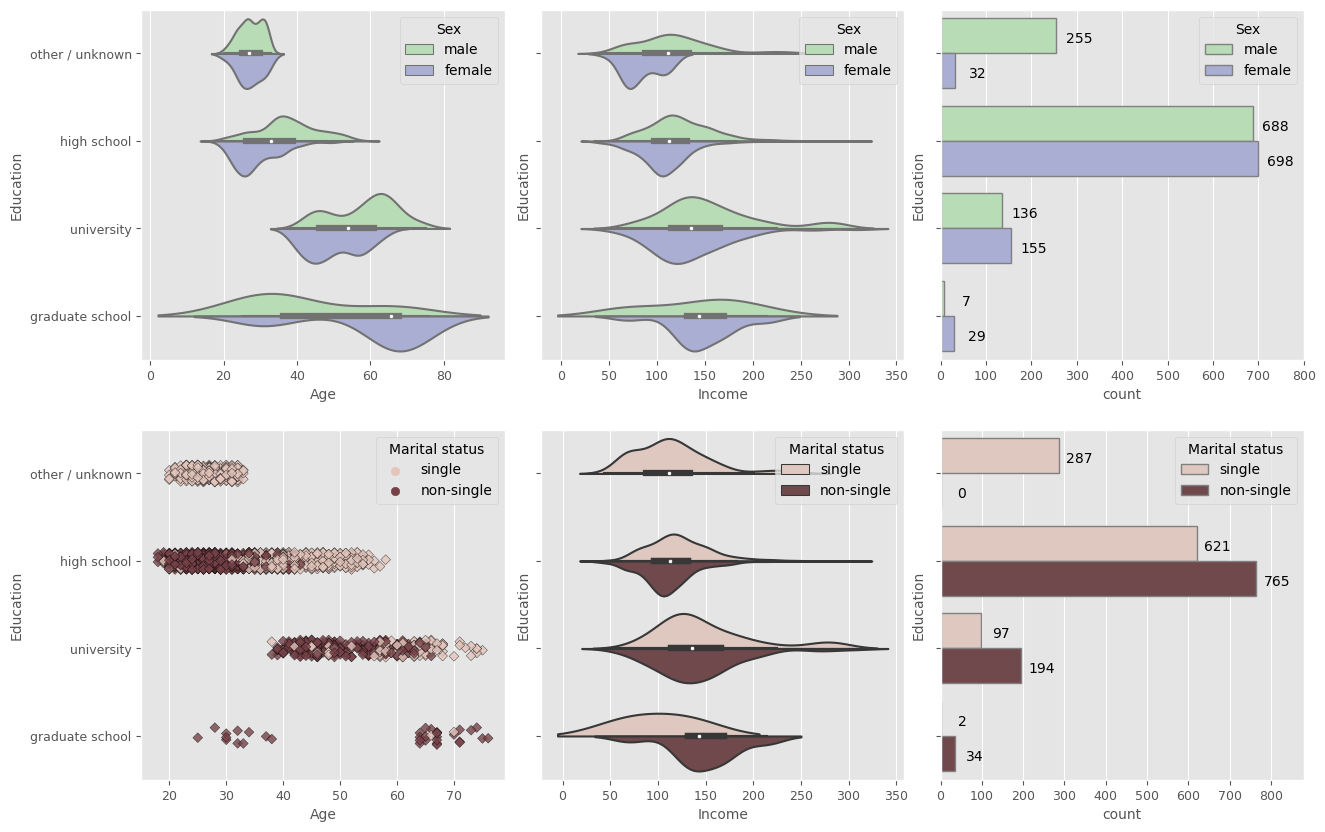

In [15]:
fig,ax = plt.subplots(2,3, figsize=(15,10), sharey=True)
ax = ax.flatten()
plt.subplots_adjust(wspace=0.1)

# Violin plot of education vs age w.r.t. sex
plt.subplot(231)
sns.violinplot(data=data, x='Age', y='Education', hue='Sex', split=True,
                      palette=['#B2E2B0', '#A3A8DA']) 
ax[0].set_yticklabels(labels=feature_labels['Education'])   # update the yticks
h,l = ax[0].get_legend_handles_labels()
ax[0].legend(h,feature_labels['Sex'],title='Sex',)          # update the legend

# Violin plot of education vs income w.r.t. sex
plt.subplot(232)
sns.violinplot(data=data, x='Income', y='Education', hue='Sex', split=True,
                      palette=['#B2E2B0', '#A3A8DA'])  
h,l = ax[1].get_legend_handles_labels()  
ax[1].legend(h,feature_labels['Sex'],title='Sex',)

# Countplot of education w.r.t. sex
plt.subplot(233, xlim=(0,800))
ax[2] = sns.countplot(data=data, y='Education', hue='Sex', palette=['#B2E2B0', '#A3A8DA'], 
                      edgecolor='gray', linewidth=1)

labels=data[['Sex','Education', 'ID']].groupby(['Sex',
                   'Education']).count().unstack(fill_value=0).stack().values.flatten()
add_barlabel(ax[2], labels)   # add bar labels

ax[2].set_yticklabels(labels=[]) 
h,l = ax[2].get_legend_handles_labels()
ax[2].legend(h,feature_labels['Sex'],title='Sex',)


# Stripplot of education vs age w.r.t. marital status
plt.subplot(234)
sns.stripplot(data=data, x='Age', y='Education', hue='Marital status', jitter=True, linewidth=0.3,
              marker='D', alpha=0.8, palette=['#E3C5BB', '#764248'], edgecolor='black', )
h,l = ax[3].get_legend_handles_labels()
ax[3].legend(h,feature_labels['Marital status'],title='Marital status',)

# Violin plot of education vs income w.r.t. marital status
plt.subplot(235)
sns.violinplot(data=data, x='Income', y='Education', hue='Marital status', split=True,
               palette=['#E3C5BB', '#764248'])
ax[4].set_yticklabels(labels=feature_labels['Education'])   
h,l = ax[4].get_legend_handles_labels()
ax[4].legend(h,feature_labels['Marital status'],title='Marital status',)

# Countplot of education w.r.t. marital status
plt.subplot(236, xlim=(0,880))
ax[5] = sns.countplot(data=data, y='Education', hue='Marital status', 
                      palette=['#E3C5BB', '#764248'], edgecolor='gray', linewidth=1)

labels = data[['Marital status','Education', 'ID']].groupby(['Marital status',
                            'Education']).count().unstack(fill_value=0).stack().values.flatten()
add_barlabel(ax[5], labels)  # add labels

ax[5].set_yticklabels(labels=[])   
h,l = ax[5].get_legend_handles_labels()
ax[5].legend(h,feature_labels['Marital status'],title='Marital status')

plt.show()

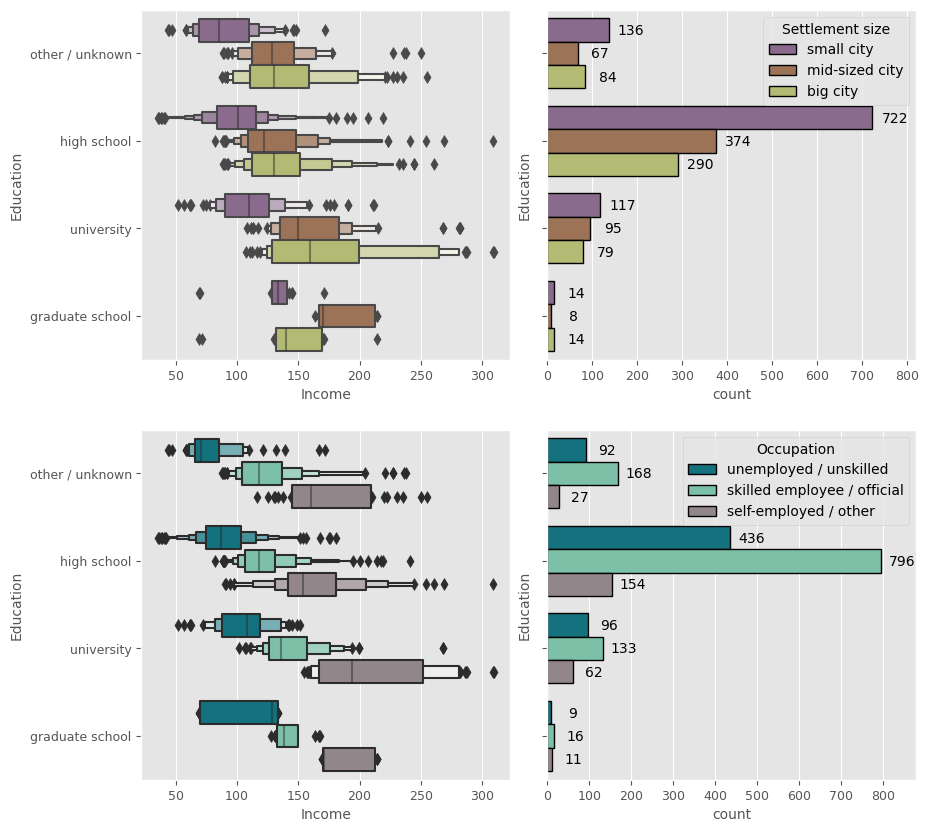

In [16]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax = ax.flatten()
plt.subplots_adjust(wspace=0.1)

# Settlement size.
sns.boxenplot(data=data, x='Income', y='Education', hue='Settlement size', 
              ax=ax[0], palette=['#8F6593', '#A9714B','#bdc667'],)
ax[0].set_yticklabels(labels=feature_labels['Education'])   # set yticks
ax[0].get_legend().set_visible(False)  # turn off the legend

plt.subplot(222, xlim=(0,820))
ax[1] = sns.countplot(data=data, y='Education', hue='Settlement size', edgecolor='black', 
                     palette=['#8F6593', '#A9714B','#bdc667'], linewidth=1)
labels = data[['Settlement size','Education', 'ID']].groupby(['Settlement size',
                            'Education']).count().unstack(fill_value=0).stack().values.flatten()
add_barlabel(ax[1], labels)  # add bar labels

ax[1].set_yticklabels(labels=[]) 
h,l = ax[1].get_legend_handles_labels()  # get the legend
ax[1].legend(h,feature_labels['Settlement size'],title='Settlement size')


# Occupation.
sns.boxenplot(data=data, x='Income', y='Education', hue='Occupation', 
              ax=ax[2], palette=['#028090', '#71cbab','#958489'],)
ax[2].set_yticklabels(labels=feature_labels['Education']) 
ax[2].get_legend().set_visible(False) 

plt.subplot(224, xlim=(0,880))
ax[3] = sns.countplot(data=data, y='Education', hue='Occupation', edgecolor='black', linewidth=1,
                      palette=['#028090', '#71cbab','#958489'])
labels = data[['Occupation','Education', 'ID']].groupby(['Occupation',
                            'Education']).count().unstack(fill_value=0).stack().values.flatten()
add_barlabel(ax[3], labels)
ax[3].set_yticklabels(labels=[]) 
h,l = ax[3].get_legend_handles_labels()
ax[3].legend(h,feature_labels['Occupation'],title='Occupation')

plt.show()

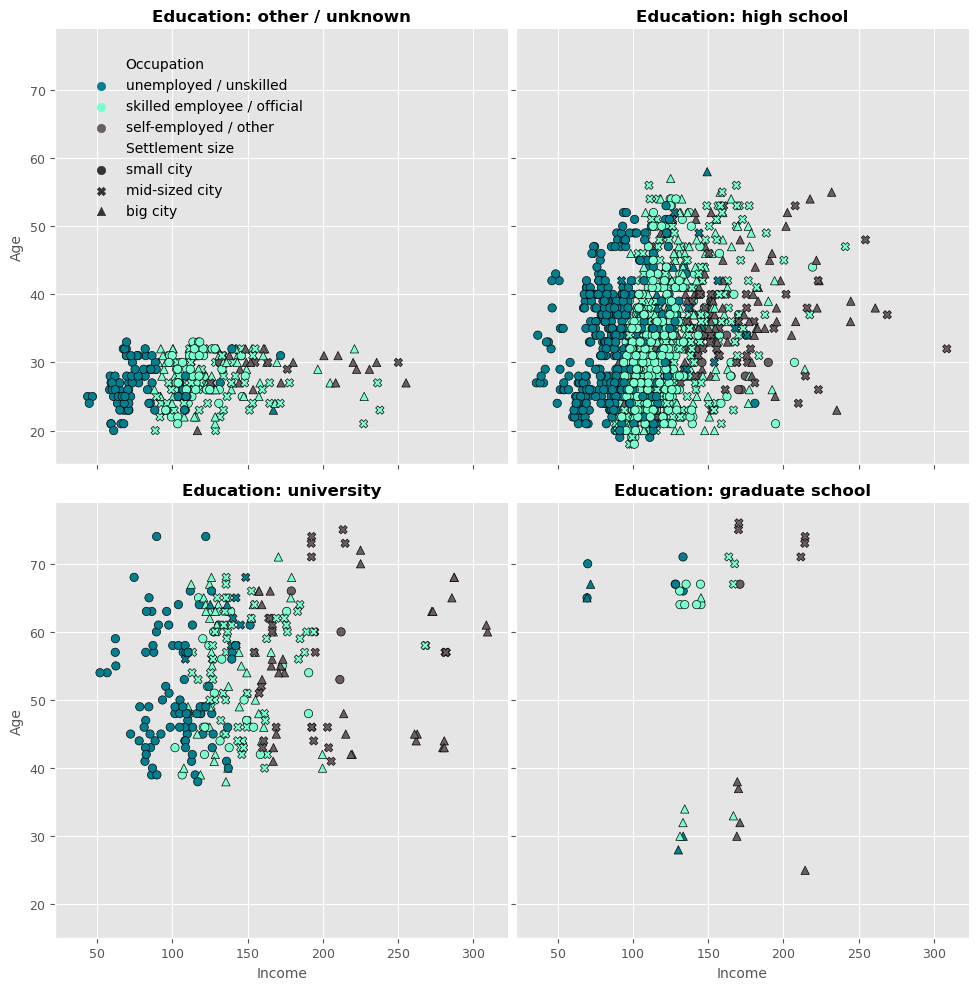

In [17]:
g = sns.relplot(
    data=data, x="Income", y="Age", col="Education",
    hue="Occupation", col_wrap=2, style='Settlement size', height=5,
    palette=['#028090', '#78FECF','#6B5E62'], edgecolor='black', markers=['o','X','^']
)

g.tight_layout(w_pad=0.2)

# Change the titles of the plots.
for ax, title in zip(g.axes, feature_labels['Education']):
    ax.set_title(f"Education: {title}")
    
# Update the legend labels manually.
h,l = g.axes[0].get_legend_handles_labels()
l[1:4] = feature_labels[l[0]]
l[5:8] = feature_labels[l[4]]

# Use the updated labels to change the legend.
for i,txt in enumerate(l):
    g._legend.texts[i].set_text(txt)
    
# Move the legend to the upper left corner.
sns.move_legend(g, "upper left", bbox_to_anchor=(0.07, 0.95),)

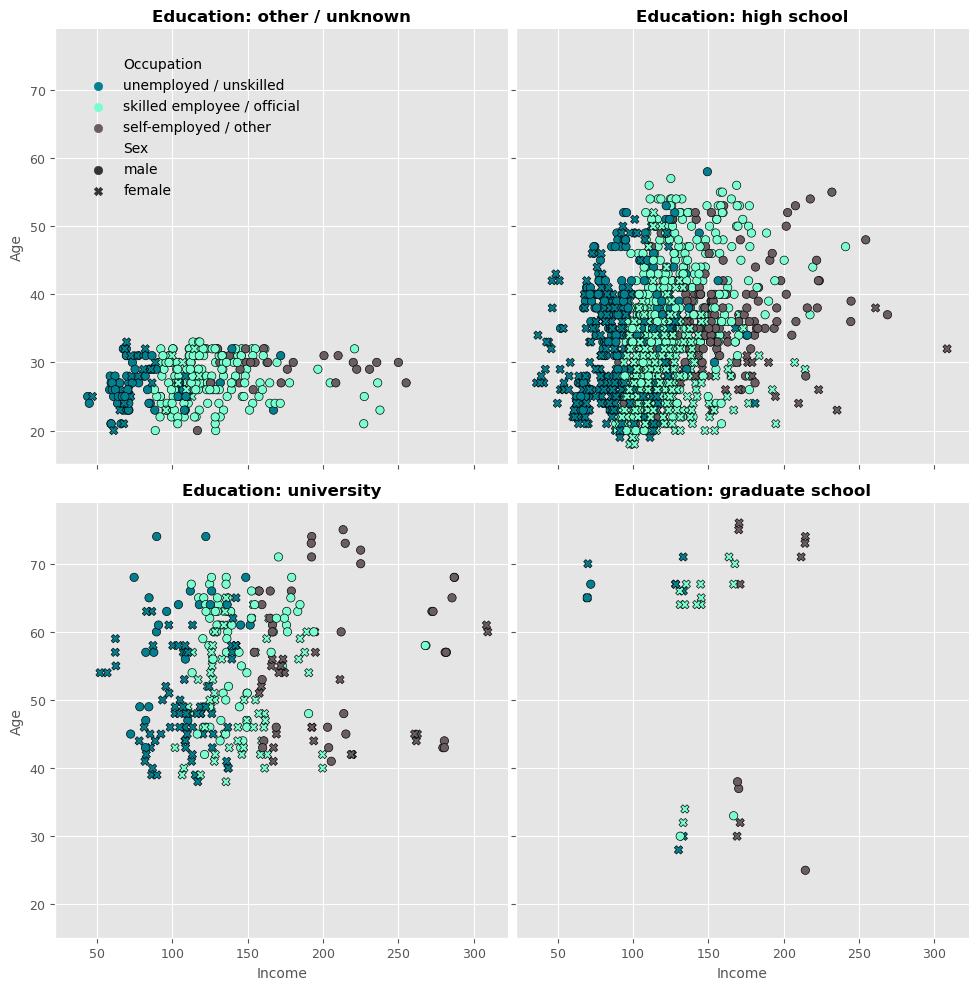

In [18]:
g = sns.relplot(
    data=data, x="Income", y="Age", col="Education",
    hue="Occupation", col_wrap=2, style='Sex', height=5,
    palette=['#028090', '#78FECF','#6B5E62'], edgecolor='black', markers=['o','X']
)

g.tight_layout(w_pad=0.2)

# Change the titles.
for ax, title in zip(g.axes, feature_labels['Education']):
    ax.set_title(f"Education: {title}")
    
# Update the legend labels manually.
h,l = g.axes[0].get_legend_handles_labels()
l[1:4] = feature_labels[l[0]]
l[5:8] = feature_labels[l[4]]

# Use the updated labels to change the legend.
for i,txt in enumerate(l):
    g._legend.texts[i].set_text(txt)
    
# Move the legend to the upper left corner.
sns.move_legend(g, "upper left", bbox_to_anchor=(0.07, 0.95),)

### Takeaways:

#### __Other/unknown level of education__

* The people with __other/unknown level of education__ are single males or females in their 20s or early 30s. Females usually earn from 45 kdol. to 120 kdol at most, with the median of 80 kdol. 
* Males, however, have slightly higher annual income: from 45 kdol. to 250 kdol. maximum with the median of 115 kdol.. Yet, this group contains only 32 females, compared to 255 males. 
* People with this background who earn from 45 kdol. to 170 kdol. max with median of 71 kdol. are unemployed/unskilled and they are either females or males and reside in small cities. 
* These that are skilled employees earn from 88 kdol. to 230 kdol. with the median of 117 kdol., these are mostly males and they tend to live in small or mid-sized cities. 
* As for 'self-employed/other', they are men who earn from 116 kdol. to 255 kdol., median equal to 160 kdol. and mostly live in big cities, rarely in mid-sized.

#### __High school diploma__

* The people with __high school diploma__ are moslty non-single females in 20s or early 30s or single males in late 30s or older. There is the same number of females and males in this group. 
* Females seem to earn from 35 kdol. to 308 kdol. annually, with the median of 106 kdol. As for males, they earn from 50 kdol. to 270 kdol. with the median of 121 kdol.. 
* People with this kind of educational attainment who earn from 35 kdol. to 181 kdol. max with the median of 87 kdol. are unemployed/unskilled, they are mostly females or sometimes males, and they live in small cities, but if the income is higher than the median income then it's possible that they reside in mid-sized cities. Generally females from this subset seem to earn the min income, but it's not necessarily only the men who get higher income. 
* The skilled employees are usually _ who earn from 82 kdol. to 241 kdol. with the median of 118 kdol., They reside in different kinds of cities, and usually the higher the income is or the older the person is, the higher the chance that they live in a larger city,but on general the females prefer small cities and the older males live in mid-sized cities. 
* In the mean time, self-employed people earn from 90 kdol. to 308 kdol., median 154 kdol., they are mostly males who frequently live in large cities, sometimes mid-sized ones if the income equal that of the median or rarely females who live in mid-sized cities.

#### __University degree__

* The people with __university degree__ are single or non-single females in late 40s/early 50s and men in late 50s / early 60s or single males in mid-60s or older.
* There is almost the same number of females and males in this group, and twice more of non-single people rather than single, which in turn says that there are more non-single females than males in this set. To be precise, there are 81 single and 55 non-single males, and 16 single and 139 non-single females. 
* Females usually have the income from 52 kdol. to 309 kdol. with the median of 127 kdol., while men earn from 72 kdol. to 287 kdol. with the median of 145 kdol. Additionally, non-single men and women tend to have a higher median income, 150 kdol and 132 kdol respectively to that of singles which is 137 kdol. and 113 kdol.. 
* People with university degree who earn from 52 kdol. to 152 kdol. with the median of 108 kdol. are unskilled/unemployed come from small cities mostly and are commonly females with slightly higher median income than men. 
* The skilled employees earn from 102 kdol. t0 270 kdol. with the median of 136 kdol are equally females or males without the difference in incomes based on sex. They often live in mid-sized cities or sometimes in big ones. 
* As for self-employed, they are either females or males, who earn from 154 kdol. to 309 kdol. with the median of 194 kdol., where men have median income of 205 kdol., while women of 193 kdol..These with lower income compared to median live usually in middle-sized cities, while this with income of 200 and higher in large cities. That means there more women living in mid-cities from this group rather than men and vice versa.

#### __Graduate school__
* The people who finished their __graduate studies__ are usually mainly females in late 60s, as well as, there are a couple of young women in late 30s, these customers averagely earn from 70 kdol. to 214 kdol. with the median of 143 kdol.. 
* The group consists of 27 non-single females with the median income of 144 kdol. and 2 single females who earn 100 kdol. median income (the only values in the group are 70 kdol, and 131 kdol.), but there are also a couple of non-single males in this group who are in their late 30s and earn from 70 kdol. to 214 kdol. with the median of 166 kdol.. 
* The people who are unemployed/unskilled earn from 70 kdol. to 133 kdol. at most, with the median of 128 kdol., they live either in big cities if young or in small ones if old. 
* As for skilled employees, they are mostly females earning from 128 kdol. to 168 kdol. with the median of 139 kdol., they reside in small cities if old, or big if young. 
* Self-employed people earn from 169 kdol. to 214 kdol. with the median of 171 kdol. They also live in big cities if they are young, or mid-sized towns if older than 60. Thus we see that young people tend to live in big cities, while these who are older move to the smaller or mid-sized ones if their income is higher than 150 kdol.

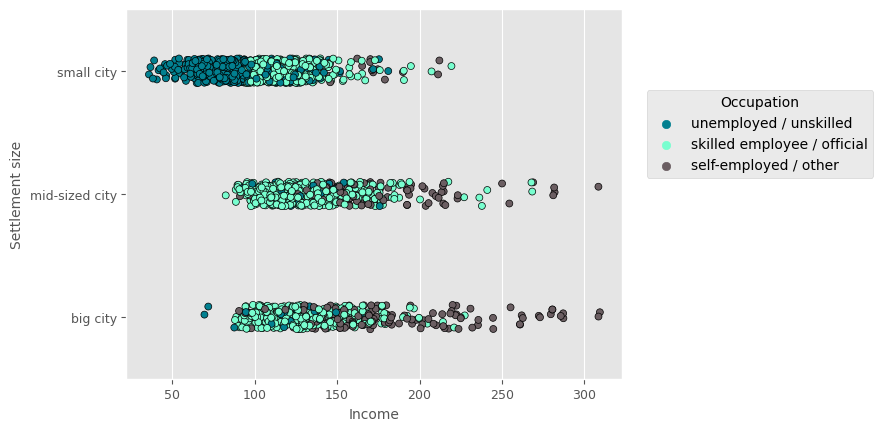

In [19]:
ax = sns.stripplot(data=data, x='Income', hue='Occupation', y='Settlement size', palette=['#028090', '#78FECF','#6B5E62'], jitter=True,edgecolor='black',linewidth=.5)

# Set the y-axis tick labels.
ax.yaxis.set_major_locator(FixedLocator(ax.get_yticks()))
ax.set_yticklabels(labels=feature_labels['Settlement size'])

# Set the legend.
h,l =  ax.get_legend_handles_labels()
ax.legend(h,feature_labels['Occupation'],title='Occupation',)

# Move the legend to the upper left corner.
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.52, .8),)

Additionally, in this figure we see once again that the more skilled the person is the higher is their income. Self-employed customers usually live in mid-sized/big cities, while usual employees reside in different kinds of cities, but only unemployed people live in small cities, but nowhere else mostly.

<a id="dimred"></a>
# Dimensionality Reduction

Principal Component Analysis (PCA) is a useful tool for customer segmentation because it helps to identify the most important factors or variables that contribute to the differences between customers. By reducing the dimensionality of the data, PCA allows us to simplify the data and focus on the most important information, which can make it easier to interpret. 

Also, it is extremely useful for data visualization. Reducing the number of dimensions down to two (or three) makes it possible to plot a condensed view of a high-dimensional data on a graph and often gain some important insights by visually detecting patterns, such as clusters. PCA is affected by scale, so we need to scale the features before applying PCA. We're going to use StandardScaler to standardize the dataset features onto unit scale (mean = 0 and standard deviation = 1) which is a requirement for the optimal performance of many Machine Learning algorithms.

In [20]:
# Scaling the data
std = StandardScaler()
data_std = pd.DataFrame(std.fit_transform(data), columns=data.columns)

# Reducing dimensions to 3.
pca = PCA(n_components=3, random_state=SEED)  
data_reduced = pd.DataFrame(pca.fit_transform(data_std),)

data_reduced.head()

0         1         2
0  2.859782  0.936676  2.036586
1  0.944130  0.394492 -2.433785
2 -0.023032 -0.881797  1.974083
3  2.212422 -0.563616  0.635332
4  2.110202 -0.425124  1.127543

In [21]:
# Create a scatterplot.
trace = go.Scatter3d(x=data_reduced[0], y=data_reduced[1], z=data_reduced[2], mode='markers',
                     marker=dict(size=3 ,opacity=0.8, color='green'),)
    
layout = go.Layout(title=dict(text='The 3D Data', x=0.5), width=600, height=600)
fig = go.Figure(data=[trace], layout=layout)

fig.show()

<a id="clustering"></a>
# Clustering

Now that we have reduced the dimensions of our data, let's get down to clustering. We'll be exploring different techniques until the desired result is reached.

<a id="kmeans"></a>
# K-Means

We'll start off with the K-Means algorithm, which is quick and efficient when it comes down to clustering.

Parameters: `n_clusters`

#### *Optimal number of clusters*

Let's try to find the optimal number of clusters using the 'elbow' method. In cluster analysis, the method consists of plotting the inertia as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

Text(0, 0.5, 'Inertia')

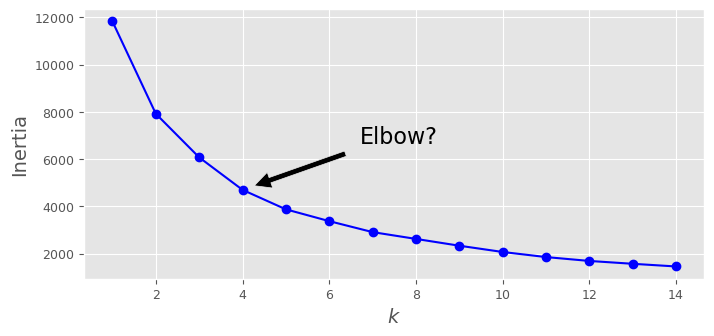

In [22]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=SEED).fit(data_reduced) for k in range(1,15)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1,15), inertias, "bo-")

plt.annotate('Elbow?',xy=(4, inertias[3]), xytext=(0.45, 0.55), textcoords='figure fraction',
             fontsize=16, arrowprops=dict(facecolor='black', shrink=0.1))

plt.xlabel('$k$', fontsize=14)
plt.ylabel('Inertia', fontsize=14)

As you can see, we don't have a clear elbow, but let's assume it is somewhere around k=4. Picking the elbow means that taking less clusters will not give us any good clusters, and taking more clusters won't get us anywhere either. Still, let's take another approach before making up our mind about the number of clusters - the silhouette score plot. 

The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like the number of clusters visually. The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

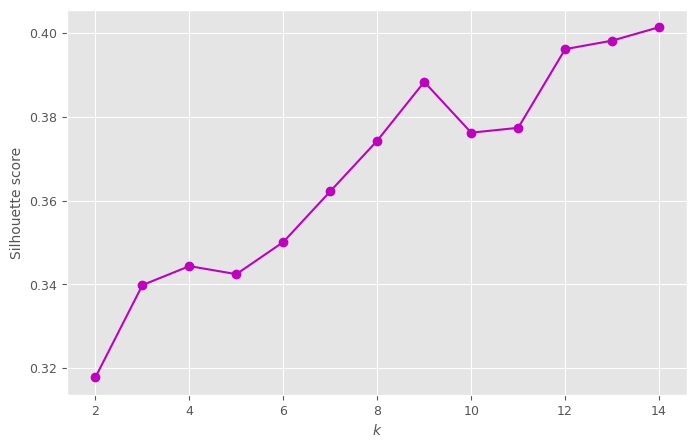

In [23]:
silhouette_scores = [silhouette_score(data_reduced, model.labels_, random_state=SEED) 
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8,5))
plt.plot(range(2,15),silhouette_scores,'mo-')
plt.xlabel("$k$", )
plt.ylabel("Silhouette score", )
plt.grid(True)

Well, it's pretty obvious that as the number of clusters grows, each instance might find itself much closer to some cluster and so the silhouette score rises, compared to when the number of clusters was lower. What we are looking for is the proof that the values around 3-6 can be used for `k`. 

Let's take a look at another diagram before making a decision. In this kind of plot every instance's silhouette coefficient is sorted by the cluster they are assigned to and by the value of the coefficient and then plotted.

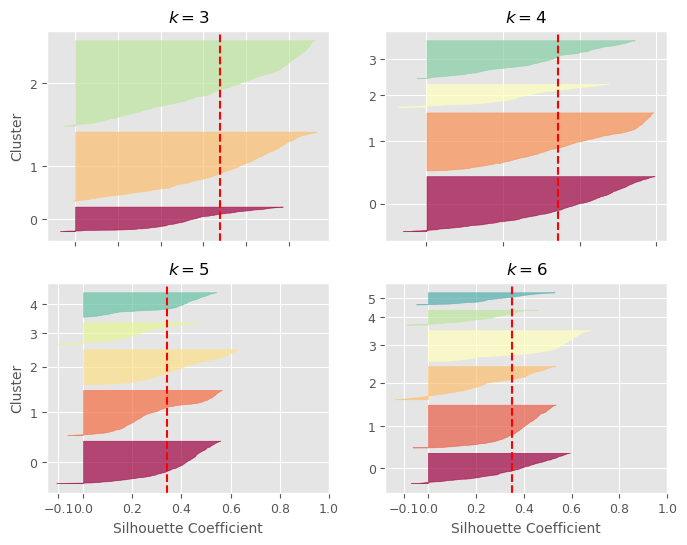

In [24]:
plt.figure(figsize=(8,6))

for k in (3,4,5,6):
    plt.subplot(2,2,k-2)
    
    y_pred = kmeans_per_k[k-1].labels_
    silhouette_coeffs = silhouette_samples(data_reduced, y_pred)
    
    padding = len(data_reduced) // 30
    pos = padding
    ticks = []
    
    for i in range(k):
        coeffs = silhouette_coeffs[y_pred == i]   # cluster coeffs
        coeffs.sort()
        
        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs, facecolor=color, 
                          edgecolor=color, alpha=0.7)
        
        ticks.append(pos + len(coeffs)//2)
        pos +=len(coeffs) + padding
        
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    
    if k in (3,5):
        plt.ylabel("Cluster")
    if k in (5,6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)
    
    plt.axvline(x=silhouette_scores[k-2], color='red', linestyle='--')
    plt.title("$k={}$".format(k),)

As we can see, from this diagram it looks like k=5 might be the best option,as all clusters are roughly the same size and cross the dashed line which is the mean silhouette score. So we will define `k=5`.

#### *Fitting KMeans with the best parameters*

Now, let's visualize these clusters to check how well the algorithm performed.

In [25]:
kmeans = KMeans(n_clusters=5, random_state=SEED)
data['kmeans_cluster'] = kmeans.fit_predict(data_reduced) # Fit the model and predict clusters
data['kmeans_cluster'] = data['kmeans_cluster'].astype('category')

In [26]:
temp = data_reduced.copy()
cluster_col = 'kmeans_cluster'
temp[cluster_col] = data[cluster_col].copy()
temp.sort_values(by=cluster_col, inplace=True)

plot_clusters3d(cluster_groups=temp, cluster_col=cluster_col, colorscale='rainbow',
                title='The Plot of Clusters (KMeans)')

#### *The distribution of clusters*

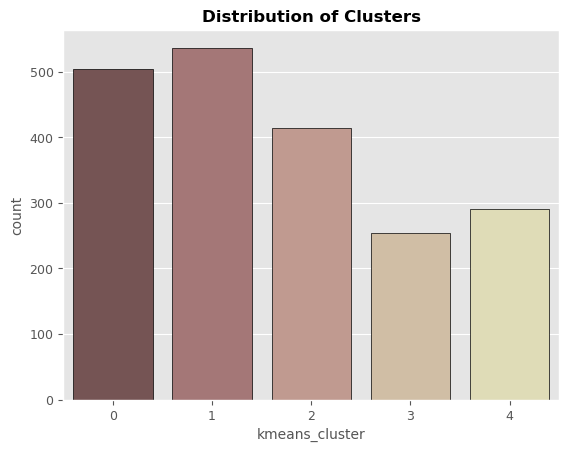

In [27]:
sns.countplot(x=data['kmeans_cluster'], palette=sns.color_palette("pink"), edgecolor='black')
plt.title('Distribution of Clusters');

So, the number of instances in each cluster is pretty much of acceptable, without very large fluctuations, and the algorithm seems to find the ways to split the data into, good or bad, clusters. 

Despite being fast and scalable, K-Means is not perfect. One of its disadvantages is the fact that it doesn't behave very well when the clusters have varying sizes, different densities, or **non-spherical shapes**. Let's experiment with other clustering algorithms to see the differences they make and pick the one that fits the data the best.

<a id="db"></a>
# Density Based Clustering (DBSCAN)

This algorithm defines clusters as continuous regions of high density. Thanks to this approach it can identify clusters of arbitrary shapes. The whole idea is of this algorithm is that if a particular point belongs to a cluster, it should be a neighbor to lots of other points in that cluster. This algorithm works well if all the clusters are dense enough, and they are well separated by low-density regions. Let's check it out.

We need to optimise two parameters: `eps` and `min_samples`.

#### *Optimal eps value and min_samples value*

`eps` is a value that deals with the radius of the clusters we are trying to find. To choose a value, we can perform a sort of elbowing technique (a similar technique that is often used to determine an optimal k in K-Means clustering), but this time using NearestNeighbors.

Then, to find the best combination of these two parameters, we'll search for the highest silhoutte score.

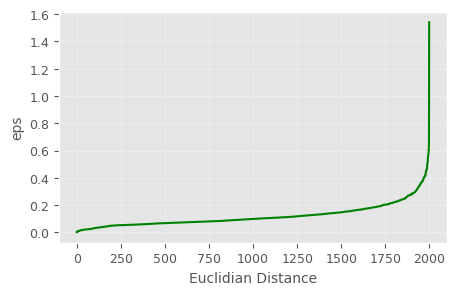

In [28]:
nn = NearestNeighbors(n_neighbors=10).fit(data_reduced)

# Calculate the average distance between each point and its k-nearest neighbors
distances, indices = nn.kneighbors(data_reduced)

# Plot number of points vs average distance. Find the elbow (eps is the y-value)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]   

plt.figure(figsize=(5,3))
plt.plot(distances, c='green', )
plt.xlabel('Euclidian Distance')
plt.ylabel('eps')
plt.grid(alpha=0.3)

By changing around the number of neighbors, we finally came to the conclusion and defined the approximate ranges for parameters. Let's assume that `eps` ranges from 0.2 to 0.8 and `min_sample` from 5 to 25. 

Now, our final choice of parameters will be decided by the best silhouette score DBSCAN gives depending on the ranges of parameters we have. Let's calculate it.

In [29]:
db_silhouette_scores = []
params = [(ms, eps.round(3)) for ms in range(5,25) for eps in np.arange(0.2, 0.8, step=0.1)]
    
for ms, eps in params:  
    pred_labels = DBSCAN(eps=eps, min_samples=ms).fit(data_reduced).labels_
    db_silhouette_scores.append(silhouette_score(data_reduced, pred_labels, random_state=SEED))

In [30]:
idx_best = np.argmax(db_silhouette_scores)   # index of the highest score
print("Best silhouette score {} for (min_samples={}, eps={})" \
      .format(db_silhouette_scores[idx_best].round(4),params[idx_best][0], params[idx_best][1]))

Best silhouette score 0.2753 for (min_samples=22, eps=0.7)


#### *Fitting DBSCAN with the best parameters*

In [31]:
dbscan = DBSCAN(eps=0.7, min_samples=22).fit(data_reduced)
pred_labels = dbscan.labels_
data['db_cluster'] = dbscan.labels_
data['db_cluster'] = data['db_cluster'].astype('category')

print(f"Number of clusters: {len(np.unique(pred_labels))} \
      \nNumber of outliers: {len(pred_labels[pred_labels==-1])}")

Number of clusters: 6       
Number of outliers: 178


In [32]:
temp = data_reduced.copy()
cluster_col = "db_cluster"
temp[cluster_col] = data[cluster_col].copy()
temp.sort_values(by=cluster_col, inplace=True)

plot_clusters3d(cluster_groups=temp, cluster_col=cluster_col, colorscale='rainbow',
                title='The Plot of Clusters (DBSCAN)')

#### *The distribution of clusters*

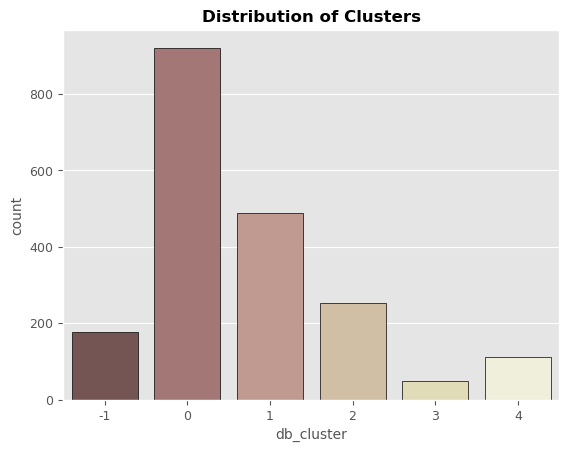

In [33]:
sns.countplot(x=data['db_cluster'], palette=sns.color_palette("pink"),edgecolor='black')
plt.title('Distribution of Clusters');

Now, the DBSCAN algorithm has managed to distinguish different ellipsoidal groups of points, as can be seen in the 3D plot. These clusters do have varying densities, so it's no wonder that the cluster no.0 has almost a half of all data points, whilst all other clusters have much less.

Let's continue to check other algorithms and we might come across an algorithm that will be able to distinguish each visible cluster in the 3D plot, so that we can later compare these different clusters computed by different algorithms and decide which one fits the data the best.

<a id="gm"></a>
# Gaussian Mixture

A Gaussian mixture model (GMM) is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown. All the instances generated from a single Gaussian distribution form a cluster that typically looks like an ellipsoid. Each cluster can have a different ellipsoidal shape, size, density and orientation.

Parameters to optimize: `n_components`, `covariance_type`

#### *Selecting the optimal number of components (clusters)*

With K-Means, you could use the inertia or the silhouette score to select the appropriate number of clusters, but with Gaussian mixtures, it is not possible to use these metrics because they are not reliable when the clusters are not spherical or have different sizes. Instead, you can try to find the model that minimizes a theoretical information criterion such as the Bayesian information criterion (BIC) or the Akaike information criterion (AIC).

Next, we'll plot both AIC and BIC for different numbers of clusters. Also, we'll try limiting the range of shapes and orientations the clusters can have by imposing constraints on the covariance matrices. There are a few possible values for `covariance_type` parameter:
* "spherical": all clusters must be spherical, but can have different diameters
* "diag": clusters can take on any ellipsoidal shape of any size.
* "tied": all clusters must have the same ellipsoidal shape, size and orientation.
* "full" (default): each cluster can take on any shape, size and orientation.

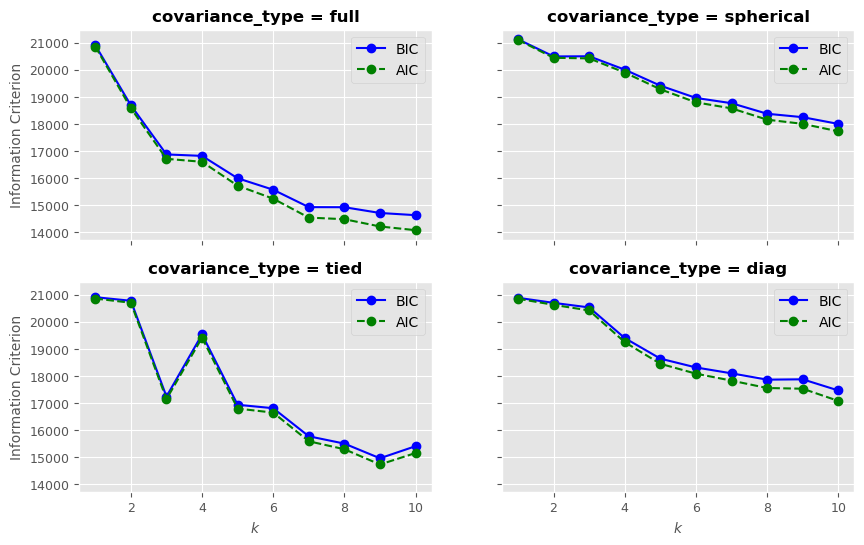

In [34]:
fig, axs = plt.subplots(2,2,figsize=(10,6), sharex=True, sharey=True)

for i, cov in enumerate(['full','spherical', 'tied', 'diag']):
    gms_per_k = [GaussianMixture(n_components=k,n_init=10, covariance_type=cov,random_state=SEED)\
                 .fit(data_reduced) for k in range(1,11)]
    bics = [model.bic(data_reduced) for model in gms_per_k]
    aics = [model.aic(data_reduced) for model in gms_per_k]
    
    plt.subplot(2,2,i+1)
    plt.plot(range(1,11), bics, "bo-", label="BIC")
    plt.plot(range(1,11), aics, "go--", label="AIC")
    
    plt.title("covariance_type = {}".format(cov))
    plt.xlabel('$k$') if i in(2,3) else plt.xlabel('')
    plt.ylabel('Information Criterion') if i in(0,2) else plt.ylabel('')
    plt.grid(True)
    plt.legend()

Let's search for best combination of values for both the number of clusters and the `covariance_type` hyperparameter:

In [35]:
min_bic = np.infty

for k in range(1,11):
    for cov in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10, covariance_type=cov, random_state=SEED)\
                             .fit(data_reduced).bic(data_reduced)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = cov
            
best_k, best_covariance_type

(10, 'full')

So we can see it is either 'tied' or 'full' that gives us the lowest IC. Well, by taking a look at the 3D plots so far, we can surely say that our data **does** have a somewhat ellipsoidal shape, so the GaussianMixtures algorithm guessed that right. The other issue that arises is that it's now up to us to decide how to treat the data that doesn't have ellipsoidal shape. Should we take it into account and treat it as separate clusters or just add them to the big clusters present? 

Personally, I'll go with the second option due to the "outlier" data having a low density, i.e. there are not enough data points to form distinct clusters, as it's scattered all over the 3D space. So from the graphs above, I'll be pretty much satisfied with parameters `covariance_type="tied"` and `k=7`.

#### *Fitting GaussianMixture with the best parameters*

In [36]:
gm = GaussianMixture(n_components=7, n_init=10, covariance_type='tied',random_state=SEED)
data['gm_cluster'] = gm.fit_predict(data_reduced)
data['gm_cluster'] = data['gm_cluster'].astype('category')

In [37]:
temp = data_reduced.copy()
cluster_col = "gm_cluster"
temp[cluster_col] = data[cluster_col].copy()
temp.sort_values(by=cluster_col, inplace=True)

plot_clusters3d(cluster_groups=temp, cluster_col=cluster_col, colorscale='rainbow',
                title='The Plot of Clusters (GaussianMixture)')

#### *The Distribution of Clusters*

Text(0.5, 1.0, 'Distribution of Clusters')

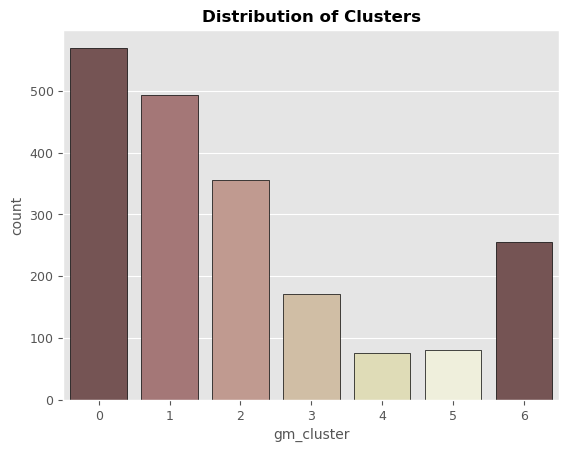

In [38]:
sns.countplot(x=data['gm_cluster'], palette=sns.color_palette("pink"), edgecolor='black')
plt.title('Distribution of Clusters')

While gaussian mixture models are able to handle clusters of varying shapes and sizes, they do make some assumptions about the shape of the clusters. Specifically, the clusters are assumed to be elliptic. This means that gaussian mixture models will not perform as well in cases where clusters are very irregularly shaped. Fortunately, we don't get to deal with that.

One of the drawbacks of GMs is that they ordinarily can be thrown off by cases where there are many outliers in the data. Also, there are lot parameters to fit, and usually the GM models require lots of data and many iterations to get good results.

Nonetheless, the result looks fairly good, because the algorithm recognized the ellipsoidal clusters. We'll check later on whether it's the right approach.

<a id="agg"></a>
# Agglomerative clustering

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample. The AgglomerativeClustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. 

It has the following parameters that we will be interested in: `linkage`, `n_clusters`

#### *Choosing optimal number of clusters*

To get the optimal number of clusters for hierarchical clustering, we make use a *dendrogram* which is tree-like chart that shows the sequences of merges or splits of clusters. If two clusters are merged, the dendrogram will join them in a graph and the height of the join will be the distance between those clusters.

We can play around with `linkage` parameter, however, we'll go with the value 'complete' as we think it seems to describe the data the best.

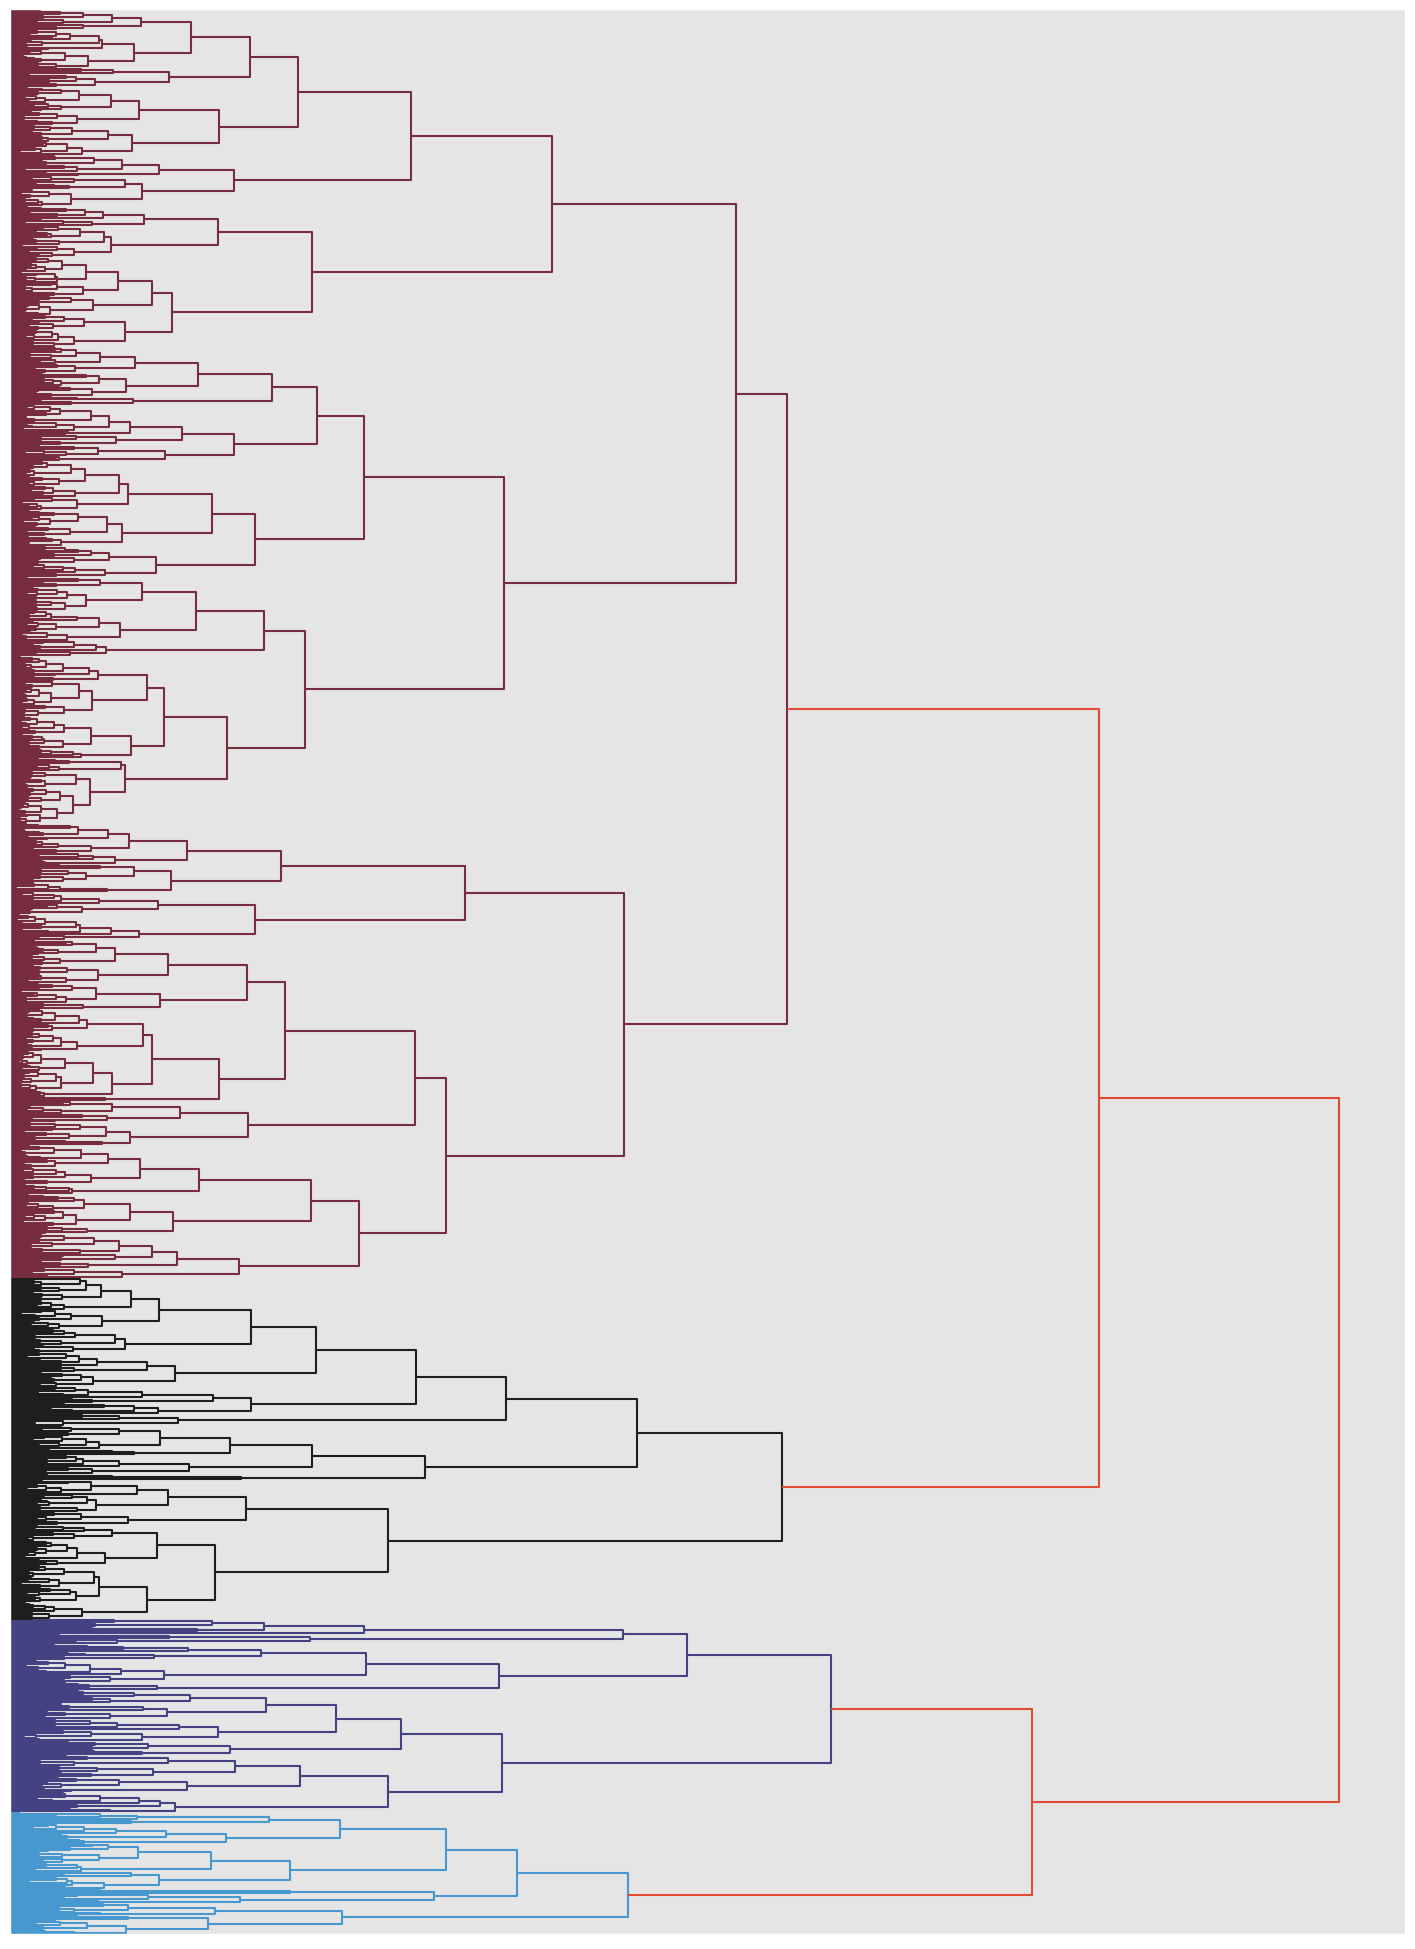

In [39]:
# Dendogram for Heirarchial Clustering
plt.figure(figsize=(18,25))
shc.set_link_color_palette(['#4798ce', '#444282', '#1f1e1e', '#782c3f', '#e25f33'])
dend = shc.dendrogram(shc.linkage(data_reduced, method='complete'),orientation='right',)

plt.gca().set(xticks=[], yticks=[])
plt.show()

We can choose the optimal number of clusters based on hierarchical structure of the dendrogram. As highlighted by other cluster validation metrics, 5 clusters can be considered good for the agglomerative hierarchical as well.

#### *Fitting the AgglomerativeClustering* with the best parameters

In [40]:
agglom = AgglomerativeClustering(n_clusters=5, linkage='complete',)
data['agg_cluster'] = agglom.fit_predict(data_reduced)
data['agg_cluster'] = data['agg_cluster'].astype('category')

In [41]:
temp = data_reduced.copy()
cluster_col = "agg_cluster"
temp[cluster_col] = data[cluster_col].copy()
temp.sort_values(by=cluster_col, inplace=True)

plot_clusters3d(cluster_groups=temp, cluster_col=cluster_col, colorscale='rainbow',
                title='The Plot of Clusters (AgglomerativeClustering)')

#### *The Distribution of Clusters*

Text(0.5, 1.0, 'Distribution of Clusters')

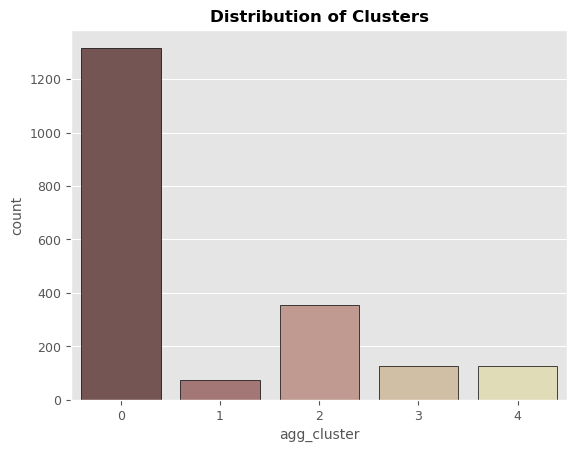

In [42]:
%matplotlib inline

sns.countplot(x=data['agg_cluster'], palette=sns.color_palette("pink"), edgecolor='black')
plt.title('Distribution of Clusters')

As we can see, AgglomerativeClustering doesn't do a good job at identifying ellipsoidal clusters, even though we have already pushed it to its limits, and got us one huge cluster,leaving all the other clusters with less than 200 data points.

Other algorithms you might find interesting:
* Spectral Clustering
* OPTICS
* Fast-MCD (EllipticEnvelope) and more..

<a id="compare"></a>
# Comparison of Clustering Algorithms

So far, we have tested out 4 different aprroaches to performing clustering. It will be fair enough to finally compare them and choose the one that is the best fit for our data before moving on to customer profiling.

In the figure below are shown the results of clustering done by each clustering algorithm. 

![Clustering Algorithms (plotted using mpl_toolkits)](https://i.ibb.co/PYWJwqr/Clusters.png)

Generally speaking, each of the algorithms mentioned predicted that the data can be assigned to from 5 to 7 clusters. That sounds good, because this fact confirms that this is the right range for an optimal number of clusters, no matter which algorithm for clustering we use.

Now, if we were to take a look at each of these plots in the figure above, we may conclude that before deciding on which algorithm performed the best we have to make some assumptions about the shape of our data first. That will define which kind of clusters we would expect for it. So far I have come to the conclusion that the best way to describe our 3-dimensional data points is to replace the high-density groups of these points with ellipsoids. If we continue to stick with our assumption, then we can clearly see that both the KMeans algorithm and the AgglomerativeClustering algorithm could not identify these clusters the way Gaussian Mixtures and DBSCAN did. They've been casually splitting these long groups of data points in a half or around that, and have been considering these parts some distance away from each other a cluster. Sometimes they happen to guess the clusters, but most of the time they fail to.

Concerning the algorithms that were able to identify the whole clusters, we may need to settle whether we want the 'noisy' data (or the data points named outliers (-1) in DBSCAN plot) to be their own cluster of underrepresented types of customers, or we would just add it to the large clusters that already exist. Both algorithms perform well, so that's the only reasoning behind our decision.

__In my opinion, it will be wise to choose the Gaussian Mixture model in this case, because it perfectly captures the visible clusters in the plot, and we would rather have a bit of noise in each cluster rather than one cluster of completely different data points that wouldn't make sense.__

<a id="profile"></a>
# Customer Profiling

 Let's now see what these clusters tell us about customers who belong to them. For that, we will take a look at the data in the light of clusters using visualization tools and then will try to figure out the nature of the clusters formed.


#### **Customer's Profile based on Sex and Marital Status**

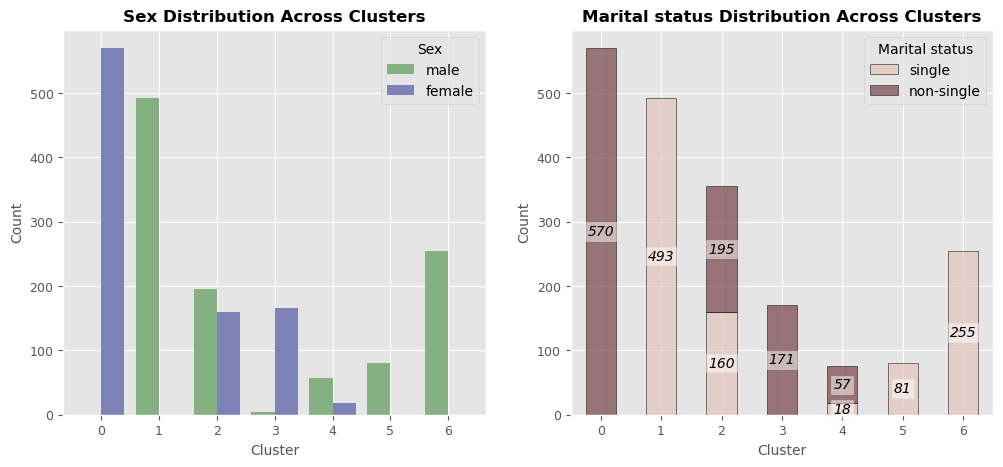

In [43]:
plt.figure(figsize=(12,5))

plt.subplot(121, title='Sex Distribution Across Clusters')
group = data[['ID','Sex', 'gm_cluster']].groupby(['gm_cluster','Sex']).count()
group.unstack().plot(kind='bar', xlabel='Cluster', ylabel='Count', ax=plt.gca(),
                     color=['#84B082','#7D82B8'], width=0.8)

# Replacing dummies with categorical values.
plt.legend(feature_labels['Sex'], loc='upper right', title='Sex', frameon=True)
plt.xticks(rotation=0)


plt.subplot(122, title='Marital status Distribution Across Clusters')
stacked_countplot_with_labels(
    data=data[['ID','Marital status', 'gm_cluster']].groupby(['gm_cluster','Marital status']).count(),
    colors=['#E3C5BB', '#764248'], xlabel='Cluster', ylabel='Count', ax=plt.gca(), alpha=.7
)
# Replacing dummies with categorical values.
plt.legend(feature_labels.get('Marital status'), loc='upper right', title='Marital status', frameon=True)
plt.xticks(rotation=0)
plt.show();

#### **Cluster's Profile Based on Education and Income**

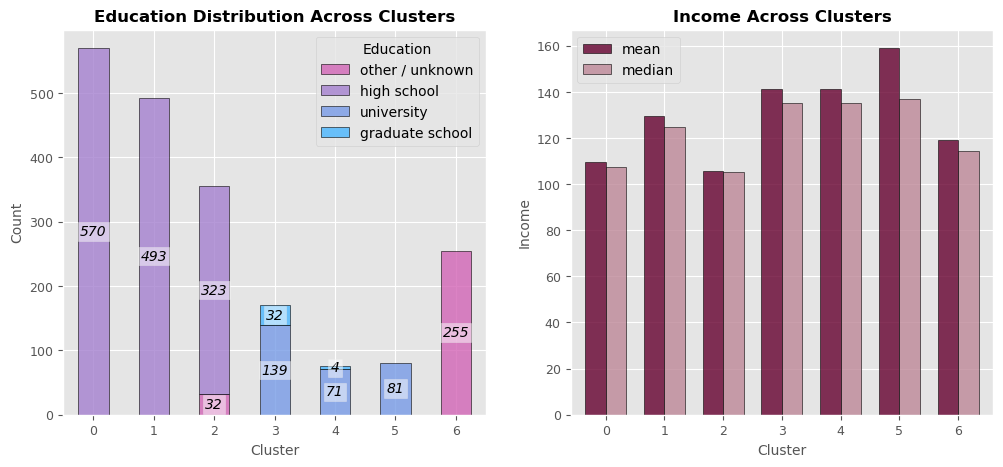

In [44]:
plt.figure(figsize=(12,5))

plt.subplot(121, title='Education Distribution Across Clusters')
colors = ['#D264B6','#a480cf','#779be7','#49b6ff']
stacked_countplot_with_labels(
    data=data[['ID','Education', 'gm_cluster']].groupby(['gm_cluster','Education']).count(),
    colors=colors, xlabel='Cluster', ylabel='Count', ax=plt.gca(), alpha=.8
)
# Replacing dummies with categorical values.
plt.legend(feature_labels['Education'], loc='upper right', title='Education', frameon=True)
plt.xticks(rotation=0)

plt.subplot(122, title='Income Across Clusters')
group = data[['Income','gm_cluster']].groupby('gm_cluster').agg(['mean','median'])
group.columns=['mean', 'median']
group.plot(kind='bar', color=["#65002E","#BD8798"], xlabel='Cluster', 
            ylabel='Income', width=0.7, edgecolor='black', ax=plt.gca(), alpha=.8)
plt.xticks(rotation=0)
plt.show()

By the way, the differences between mean and median are not always huge, but sometimes are, so we'll use the median as a measure of income for each cluster.

#### **Cluster's Profile Based on Occupation and Settlement size**

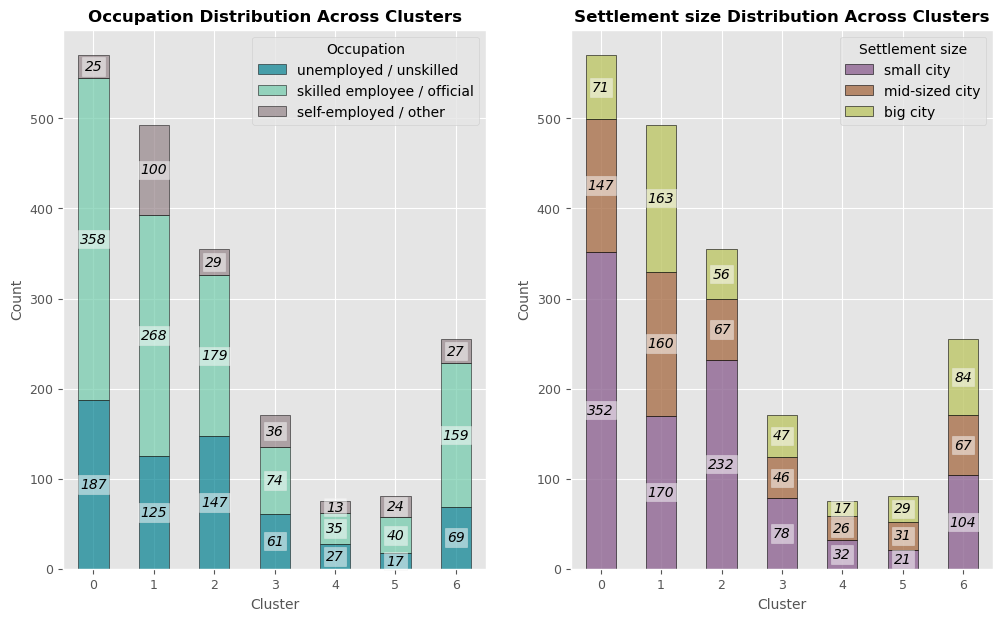

In [45]:
plt.figure(figsize=(12,7))
plt.subplot(121, title='Occupation Distribution Across Clusters')
colors = ['#028090', '#71cbab','#958489']
stacked_countplot_with_labels(
    data=data[['ID','Occupation', 'gm_cluster']].groupby(['gm_cluster','Occupation']).count(),
    colors=colors, xlabel='Cluster', ylabel='Count', ax=plt.gca(), alpha=.7
)
# Replacing dummies with categorical values.
plt.legend(feature_labels.get('Occupation'), loc='upper right', title='Occupation', frameon=True)
plt.xticks(rotation=0)

plt.subplot(122, title='Settlement size Distribution Across Clusters')
colors = ['#8F6593', '#A9714B','#bdc667']
stacked_countplot_with_labels(
    data=data[['ID','Settlement size', 'gm_cluster']].groupby(['gm_cluster','Settlement size']).count(),
    colors=colors, xlabel='Cluster', ylabel='Count', ax=plt.gca(), alpha=.8,
)
# Replacing the dummies with categorical values.
plt.legend(feature_labels.get('Settlement size'), loc='upper right', title='Settlement size', frameon=True)
plt.xticks(rotation=0);

#### **Customer's Profile based on Age**

To make a "bar of pie" we used this [code](https://matplotlib.org/stable/gallery/pie_and_polar_charts/bar_of_pie.html#sphx-glr-gallery-pie-and-polar-charts-bar-of-pie-py). This code makes a "bar of pie" chart where the first slice of the pie is "exploded" into a bar chart with a further breakdown of said slice's characteristics.


In [46]:
def bar_of_pie_chart(cluster_members, age_per_cluster, cluster_number):
    # make figure and assign axis objects
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
    fig.subplots_adjust(wspace=0)

    # pie chart parameters
    overall_ratios = cluster_members.percent.values
    labels = cluster_members.index
    explode = [0]*len(labels)
    explode[cluster_number] = 0.1
    colors = sns.color_palette('hls', len(labels))
    
    # rotate so that the wedge is split by the x-axis
    angle = -180*overall_ratios[0]
    if cluster_number > 0:
        angle -=52 * cluster_number
    
    wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                         labels=labels, explode=explode, colors=colors, 
                         wedgeprops=dict(edgecolor='white', linewidth=0.7), shadow=True)

    # bar chart parameters
    age_ratios = age_per_cluster.percent.loc[cluster_number].values
    age_labels = age_per_cluster.percent.loc[cluster_number].index.values
    bottom = 1
    width = .2

    # Adding from the top matches the legend.
    for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
        if height == 0:   # don't show the label in legend and values on the bar if there are no people in this age group.
            continue
        bottom -= height
        bc = ax2.bar(0, height, width, bottom=bottom, color='b', label=label,
                     alpha= 0.15 + 0.15 * j)
        ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center', color='black', 
                      fontweight='black',)

    ax2.set_title('Age of customers')
    ax2.legend()
    ax2.axis('off')
    ax2.set_xlim(- 2.5 * width, 2.5 * width)

    # use ConnectionPatch to draw lines between the two plots
    theta1, theta2 = wedges[cluster_number].theta1, wedges[cluster_number].theta2
    center, r = wedges[cluster_number].center, wedges[cluster_number].r
    bar_height = sum(age_ratios)

    # draw top connecting line
    x = r * np.cos(np.pi / 180 * theta2) + center[0]
    y = r * np.sin(np.pi / 180 * theta2) + center[1]
    con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                          xyB=(x, y), coordsB=ax1.transData)
    con.set_color([0, 0, 0])
    con.set_linewidth(2)
    ax2.add_artist(con)

    # draw bottom connecting line
    x = r * np.cos(np.pi / 180 * theta1) + center[0]
    y = r * np.sin(np.pi / 180 * theta1) + center[1]
    con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                          xyB=(x, y), coordsB=ax1.transData)
    con.set_color([0, 0, 0])
    ax2.add_artist(con)
    con.set_linewidth(2)

In [47]:
group = data[['ID','Age', 'gm_cluster']].sort_values(by='gm_cluster')

# Group Age feature into a few categories.
max_age = group['Age'].max()
group['Age'].replace(range(15,25), "Under 25", inplace=True)
group['Age'].replace(range(25,35), "25-34", inplace=True)
group['Age'].replace(range(35,45), "35-44", inplace=True)
group['Age'].replace(range(45,61), "45-60", inplace=True)
group['Age'].replace(range(61, max_age+1), "Over 60", inplace=True)

# Cluster & Age count and percents
age_per_cluster = group.groupby(['gm_cluster','Age']).count()
age_per_cluster.rename(columns={'ID':'count'}, inplace=True)
age_per_cluster['percent'] = age_per_cluster.groupby(level=0).transform(lambda x: 
                                                                        (x / x.sum()).round(2))

# Cluster count and percents
cluster_members = data[['gm_cluster','ID']].groupby(['gm_cluster']).count()
cluster_members.rename(columns={'ID':'count'}, inplace=True)
cluster_members['percent'] = cluster_members['count'] / cluster_members['count'].sum()

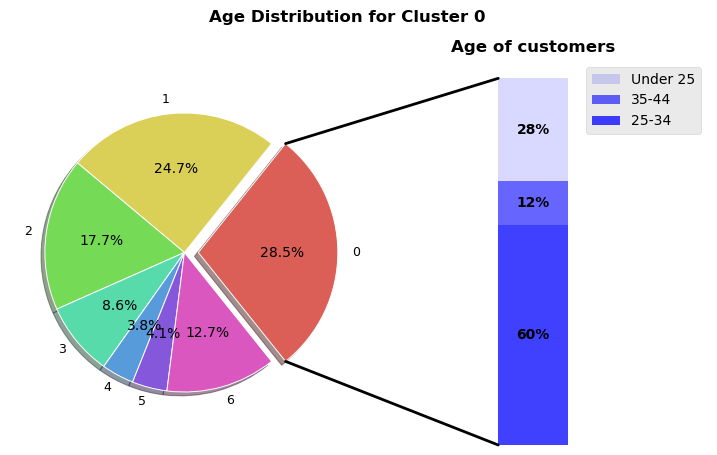

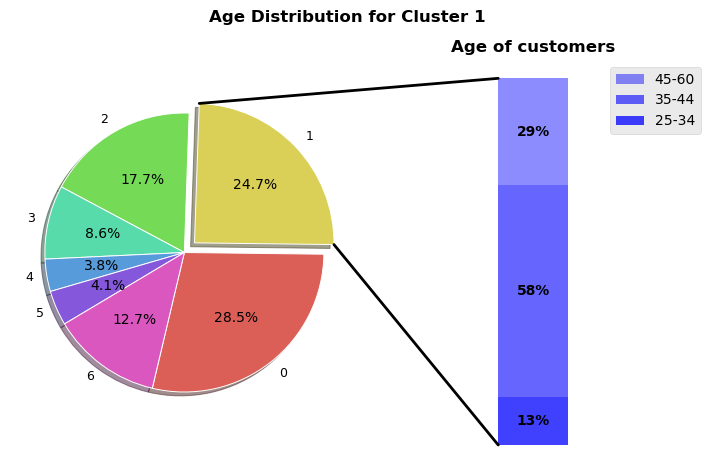

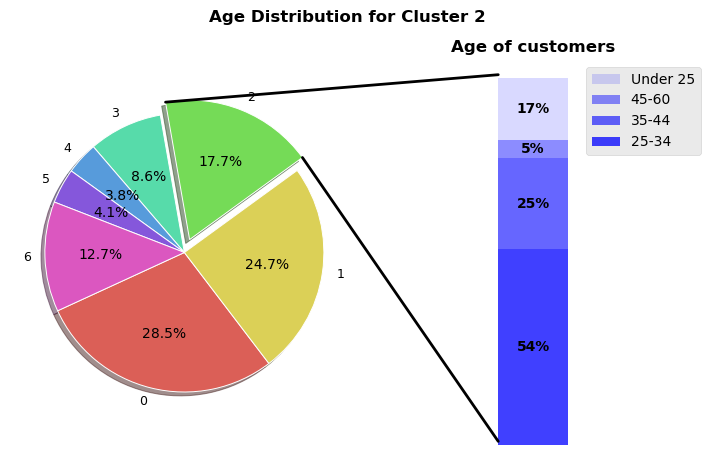

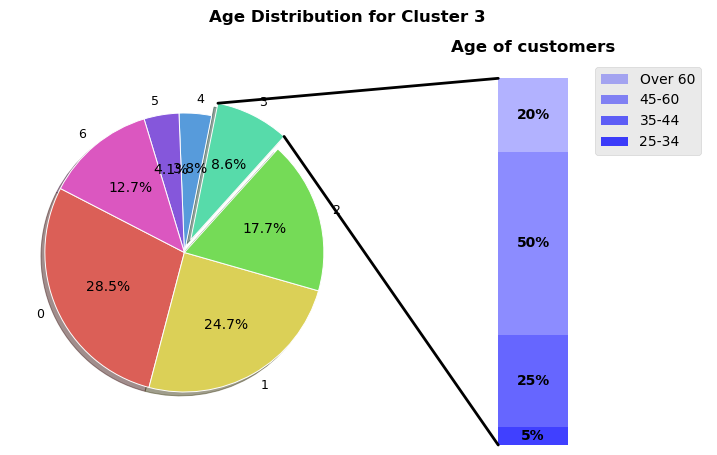

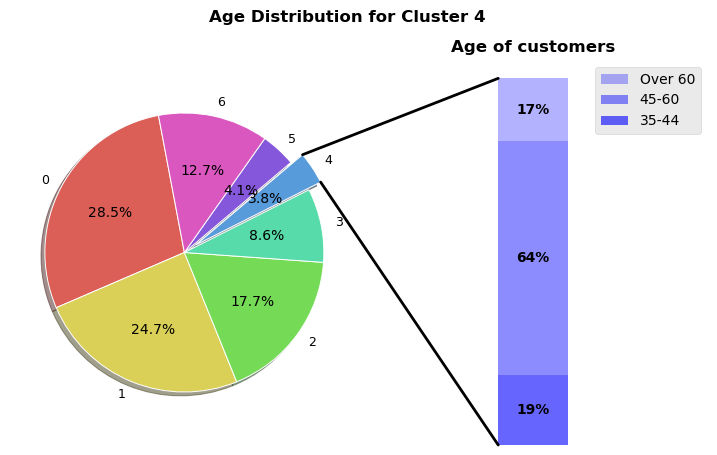

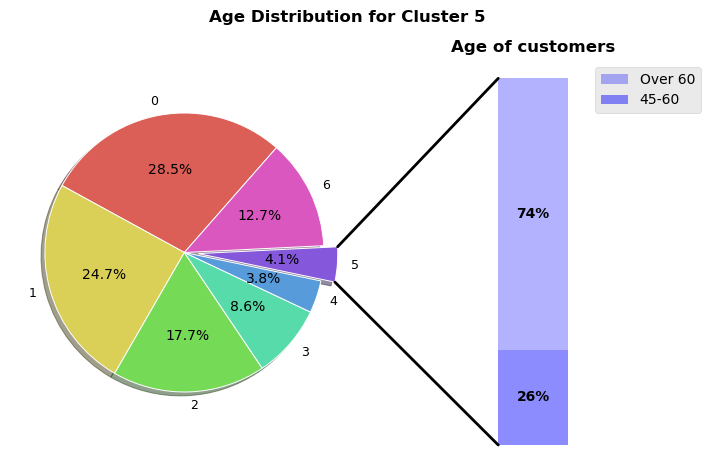

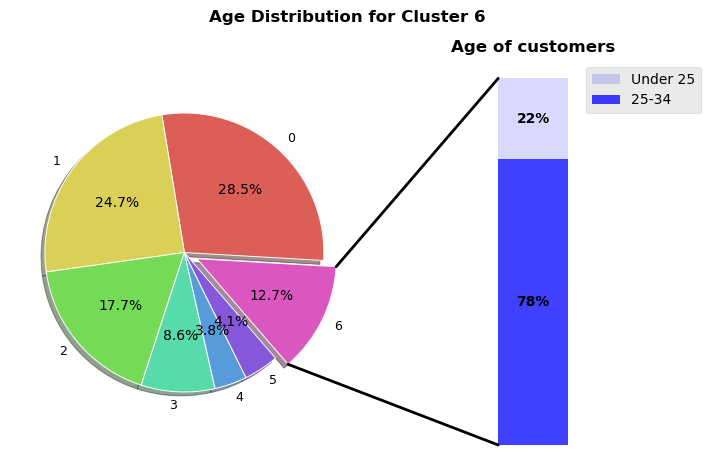

In [48]:
# Let's see what age groups each cluster consists of.
for k in range(7):
    bar_of_pie_chart(cluster_members, age_per_cluster, cluster_number=k)
    plt.suptitle("Age Distribution for Cluster {}".format(k), fontweight='bold')

#### **Customer's Profile from Jointplots**

In [49]:
# Convert categorical values back to numerical
for col in ['Sex','Marital status','Occupation','Settlement size','Education']:
    data[col] = data[col].astype(np.int64)

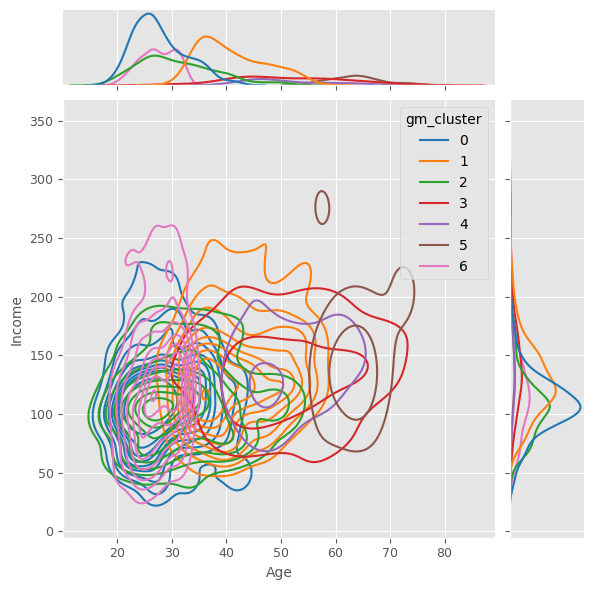

In [50]:
sns.jointplot(x=data["Age"], y=data['Income'], hue=data["gm_cluster"], kind="kde", 
              palette='tab10')

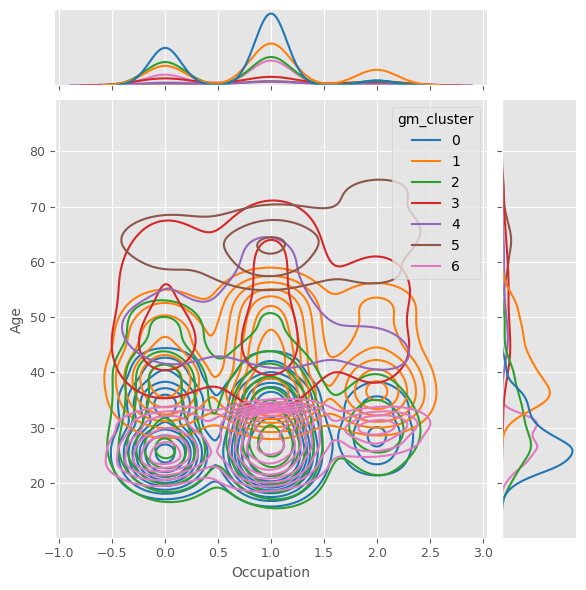

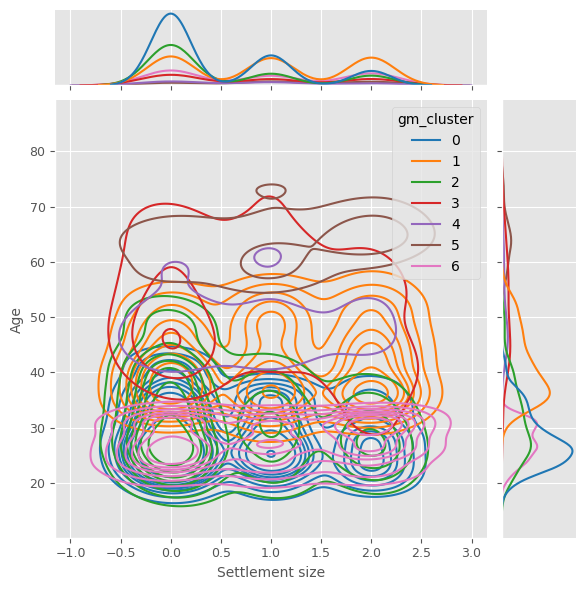

In [51]:
sns.jointplot(x=data['Occupation'], y=data['Age'], hue=data["gm_cluster"], kind="kde", 
              palette='tab10')

sns.jointplot(x=data['Settlement size'], y=data['Age'], hue=data["gm_cluster"], kind="kde", 
              palette='tab10')

#### **Number of Customers in Each Cluster**

What's worth mentioning is how many customers are there in each cluster. The customer profile of the cluster may vary depending on how many people are in that cluster, whether it's 500 or 100. The clusters with greater numbers of customers do seem trust-worthy, since they capture all similarities between customers and generalize them. However, small clusters are not necessarily terrible, because they might consist of the underrepresented population visiting the mall. For example, including underrepresented population groups in customer segmentation can provide a competitive advantage for businesses, this way businesses can differentiate themselves from competitors and gain market share. Conversely, underrepresented population groups may represent untapped market potential that can be leveraged for business growth, so by identifying and targeting these groups through customer segmentation, businesses can expand their customer base and increase revenue.

[Text(0, 0.5, 'Number of Customers'), Text(0.5, 0, 'Cluster')]

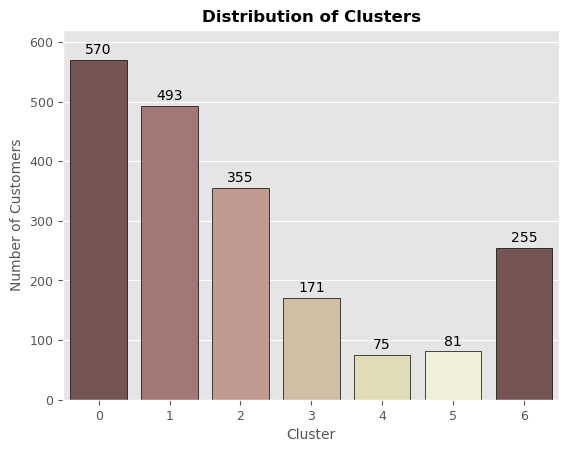

In [52]:
plt.subplot(111, title='Distribution of Clusters', ylim=(0,620))
ax = sns.countplot(x=data['gm_cluster'], palette=sns.color_palette("pink"), edgecolor='black')

# Adding labels
for rect, label in zip(ax.patches, pd.DataFrame(data[['gm_cluster']].value_counts()).sort_values(by='gm_cluster').values.flatten()):
    height=rect.get_height()
    ax.text(rect.get_x()+rect.get_width()*0.5, height+10, label, ha='center')
ax.set(ylabel='Number of Customers', xlabel='Cluster')

We see that clusters 4 and 5 have the lowest number of customers in them, so we'll have to pay attention to what's so different about them compared to other clusters, and be careful when creating customer profiles.

<a id="summary"></a>
# Summary of Clusters

To get to the point, the results can be summarized using the picture presented below, which shows short descriptions of types of customers in each cluster. Else, there are more thorough descriptions of clusters that the interested reader can find right after the picture.

<img src="https://raw.githubusercontent.com/Sofxley/customer-segmentation/main/images/summary_profiling.png" width="800" height="600" />

***
#### **Cluster 0**
***
<u>Sex:</u>  female

<u>Marital status:</u> non-single

<u>Age:</u> Under 25 (28%) / 25-34 (60%) / 35-44 (12%)

<u>Education:</u> high school

<u>Income:</u> 107 k($)

<u>Occupation:</u> mostly skilled employee, sometimes unemployed, very rarely self-employed

<u>Settlement size:</u> small city, rarely mid-sized city and even less common big city.

<u>Description</u>:

Cluster 0 is characterized by customers who are non-single females in their 20s (commonly 27 years old) with the high school diploma. For the most part, they are employed, albeit sometimes are not. Basically, they live in small towns and earn slightly lower than the median salary.

***
#### **Cluster 1**
***
<u>Sex</u>: male

<u>Marital status:</u> single

<u>Age:</u> 25-34 (13%) / 35-44 (58%) / 45-60 (29%)

<u>Education:</u> high school

<u>Income:</u> 125 k($)

<u>Occupation:</u> mostly skilled employee,sometimes unemployed or self-employed 

<u>Settlement size:</u> any kind of city.

<u>Description</u>:

Cluster 1 is characterized by customers who are single males with an average age of 40. They have never attended a university, but do mostly have a job, but not necessarily. They come from different kinds of settlements, and have a slightly higher income, compared to the median income.

***
#### **Cluster 2**
***
<u>Sex:</u>  male or female

<u>Marital status:</u>  either single or non-single

<u>Age:</u> Under 25 (17%) / 25-34 (54%) / 35-44 (25%) / 45-60 (5%)

<u>Education:</u> high school, pretty rarely unknown

<u>Income:</u> 105 k($)

<u>Occupation:</u> either skilled employee or unemployed, rarely self-employed

<u>Settlement size:</u> small city, rarely mid-sized city or big city.

<u>Description</u>:
    
Cluster 2 is characterized by customers who are of any gender or civil status in commonly late 20s or 30s. They have earned a high school diploma, and either have or don't have a job. Also,their annual income is below the median income. They usually live in small towns.

***
#### **Cluster 3**
***
<u>Sex: </u> almost only female

<u>Marital status:</u> non-single

<u>Age:</u> 25-34(5%) / 35-44 (25%) / 45-60 (50%) / over 60 (20%)

<u>Education:</u> university, sometimes graduate school

<u>Income:</u> 135 k($)

<u>Occupation:</u> either skilled employee or unemployed, sometimes self-employed

<u>Settlement size:</u> most likely small city, sometimes mid-sized or big city.

<u>Description</u>:

Cluster 3 is characterized by customers who are mainly non-single females in their 40s or 50s, who graduated from university or even from graduate school. They have a high annual income and are either employed or unemployed, also, quite often in this cluster one can find self-employed people. They usually live in towns, but meeting the customer from this cluster from a mid-sized or a large city is not surprising too.

***
#### **Cluster 4**
***
<u>Sex:</u> mostly male, rarely female

<u>Marital status:</u> mostly non-single, rarely single

<u>Age:</u> 35-44 (19%) / 45-60 (64%) / over 60 (17%)

<u>Education:</u> university, pretty rarely graduate school

<u>Income:</u> 135 k($)

<u>Occupation:</u> mostly skilled employee or unemployed, sometimes self-employed 

<u>Settlement size:</u> any kind of city

<u>Description</u>:
    
Cluster 4 is characterized by customers who are mostly non-single males in their 40s, who graduated from university. They make a high salary, yet, some of them are unemployed. The urban settlement doesn't play a huge role if we are talking about the customers from this cluster.

***
#### **Cluster 5**
***
<u>*Sex:*</u>  male

<u>*Marital status:*</u> single

<u>*Age:*</u> 45-60 (26%) / over 60 (74%)

<u>*Education:*</u> university

<u>*Income:*</u> 137 k($)

<u>*Occupation:*</u> mostly skilled employee, sometimes unemployed or self-employed

<u>*Settlement size:*</u> any kind of city

<u>Description</u>:
    
Cluster 5 is characterized by customers who are single males over 60 years old, are those who graduated from university and have a stable high income. On the whole, the customers do have a job/business, but not necessarily. They reside in any kinds of settlement areas.

***
#### **Cluster 6**
***
<u>Sex:</u>  male

<u>Marital status:</u>  single

<u>Age:</u> under 25 (22%) / 25-34 (78%)

<u>Education:</u> unknown

<u>Income:</u> 115 k($)

<u>Occupation:</u> mostly skilled employee, sometimes unemployed, rarely self-employed

<u>Settlement size:</u> mostly small or big city, sometimes mid-sized.

<u>Description</u>:
    
Cluster 6 is characterized by customers who are single males in 20s with unknown level of education, earning the median salary. These mostly reside in small or big cities, and have stable jobs, though sometimes they do not.

<a id="conclusion"></a>
## Conclusions and Feature Work

To sum up, in this project I performed unsupervised clustering in order to identify the similarities between the customers and group them into clusters, depending on how much they are alike. Firstly, I've done some exploration of the data we are dealing with to get the grasp of what exactly the features in the dataset are, then I decided to reduce the dimensionality of the dataset. Secondly, I've looked at a few clustering algorithms (KMeans, DBSCAN, Gaussian Mixtures, Agglomerative Clustering) and compared all of them to see which of them fit the data the way I wanted to see it fit. As a result, I've chosen the **Gaussian Mixtures** algorithm that predicted that our data should be split into **7 clusters**, summarized in the figure below, each describing a different group of customers for the data provided from a supermarket mall. This information can later on be used to understand better the customers who frequent to this particular mall.

Concerning the future work, of course, there are a lot of things that can be done differently. Namely, other clustering techniques can be used or other, more clear and more meaningful, ways to visualize the data can be implemented. Nevertheless, it isn't in my plans to continue finding the optimal solutions for this project. Specifically, I do not have the interest in this particular dataset anymore. I'll be looking forward to using the knowledge I gained while working on this project in the future projects of mine. 